In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


dataframe = pd.read_excel('default_of_credit_card_clients.xls', header=1)


dataframe

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [2]:
class PrepareColumnAndIndex(BaseEstimator, TransformerMixin):
    def __init__(self, index_col='ID', new_column_names=None, categorical_columns=None):
        """
        Inicjalizacja transformera.
        
        Parameters:
        - index_col (str): Nazwa kolumny do ustawienia jako indeks.
        - new_column_names (dict): Słownik mapujący stare nazwy kolumn na nowe.
        - categorical_columns (list): Lista kolumn do konwersji na typ 'category'.
        """
        self.index_col = index_col
        self.new_column_names = new_column_names or {}
        self.categorical_columns = categorical_columns or []

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # tworzenie kopii, aby nie modyfikować oryginalnego dataframe
        df_transformed = X.copy()
        
        # ustawienie indeksu
        if self.index_col in df_transformed.columns:
            df_transformed.set_index(self.index_col, inplace=True)
        
        # zmiana nazw kolumn
        if self.new_column_names:
            df_transformed.rename(columns=self.new_column_names, inplace=True)
        
        # konwersja na kategorie -> zmienne kategoryczne
        for col in self.categorical_columns:
            if col in df_transformed.columns:
                df_transformed[col] = df_transformed[col].astype('category')
        
        return df_transformed

# definicja parametrów
## nazwy kolumn na bazie opisu zmiennych
new_columns = {
    'LIMIT_BAL': 'X1_LIMIT_BAL',
    'SEX': 'X2_SEX',
    'EDUCATION': 'X3_EDUCATION',
    'MARRIAGE': 'X4_MARRIAGE',
    'AGE': 'X5_AGE',
    'PAY_0': 'X6_PAY_SEP',
    'PAY_2': 'X7_PAY_AUG',
    'PAY_3': 'X8_PAY_JUL',
    'PAY_4': 'X9_PAY_JUN',
    'PAY_5': 'X10_PAY_MAY',
    'PAY_6': 'X11_PAY_APR',
    'BILL_AMT1': 'X12_BILL_AMT_SEP',
    'BILL_AMT2': 'X13_BILL_AMT_AUG',
    'BILL_AMT3': 'X14_BILL_AMT_JUL',
    'BILL_AMT4': 'X15_BILL_AMT_JUN',
    'BILL_AMT5': 'X16_BILL_AMT_MAY',
    'BILL_AMT6': 'X17_BILL_AMT_APR',
    'PAY_AMT1': 'X18_PAY_AMT_SEP',
    'PAY_AMT2': 'X19_PAY_AMT_AUG',
    'PAY_AMT3': 'X20_PAY_AMT_JUL',
    'PAY_AMT4': 'X21_PAY_AMT_JUN',
    'PAY_AMT5': 'X22_PAY_AMT_MAY',
    'PAY_AMT6': 'X23_PAY_AMT_APR',
    'default payment next month': 'Y_DEFAULT_PAYMENT'
}

## zmienne kategoryczne
categorical_columns = ['X2_SEX', 'X3_EDUCATION', 'X4_MARRIAGE', 
                      'X6_PAY_SEP', 'X7_PAY_AUG', 'X8_PAY_JUL', 
                      'X9_PAY_JUN', 'X10_PAY_MAY', 'X11_PAY_APR', 
                      'Y_DEFAULT_PAYMENT']

## utworzenie pipeline
steps = [
    ('prepare_column_and_index', PrepareColumnAndIndex(
        index_col='ID',
        new_column_names=new_columns,
        categorical_columns=categorical_columns
    ))
]
data_preparation_pipeline = Pipeline(steps=steps)

## transformacja
dataframe_prepared = data_preparation_pipeline.fit_transform(dataframe)


dataframe_prepared

X1_LIMIT_BAL X2_SEX X3_EDUCATION X4_MARRIAGE  X5_AGE X6_PAY_SEP  \
ID                                                                       
1             20000      2            2           1      24          2   
2            120000      2            2           2      26         -1   
3             90000      2            2           2      34          0   
4             50000      2            2           1      37          0   
5             50000      1            2           1      57         -1   
...             ...    ...          ...         ...     ...        ...   
29996        220000      1            3           1      39          0   
29997        150000      1            3           2      43         -1   
29998         30000      1            2           2      37          4   
29999         80000      1            3           1      41          1   
30000         50000      1            2           1      46          0   

      X7_PAY_AUG X8_PAY_JUL X9_PAY_JUN X10_PAY_MAY  ... X15_BILL_AMT_JUN  \
ID                                                  ...                    
1              2         -1         -1          -2  ...                0   
2              2          0          0           0  ...             3272   
3              0          0          0           0  ...            14331   
4              0          0          0           0  ...            28314   
5              0         -1          0           0  ...            20940   
...          ...        ...        ...         ...  ...              ...   
29996          0          0          0           0  ...            88004   
29997         -1         -1         -1           0  ...             8979   
29998          3          2         -1           0  ...            20878   
29999         -1          0          0           0  ...            52774   
30000          0          0          0           0  ...            36535   

       X16_BILL_AMT_MAY  X17_BILL_AMT_APR  X18_PAY_AMT_SEP  X19_PAY_AMT_AUG  \
ID                                                                            
1                     0                 0                0              689   
2                  3455              3261                0             1000   
3                 14948             15549             1518             1500   
4                 28959             29547             2000             2019   
5                 19146             19131             2000            36681   
...                 ...               ...              ...              ...   
29996             31237             15980             8500            20000   
29997              5190                 0             1837             3526   
29998             20582             19357                0                0   
29999             11855             48944            85900             3409   
30000             32428             15313             2078             1800   

       X20_PAY_AMT_JUL  X21_PAY_AMT_JUN  X22_PAY_AMT_MAY  X23_PAY_AMT_APR  \
ID                                                                          
1                    0                0                0                0   
2                 1000             1000                0             2000   
3                 1000             1000             1000             5000   
4                 1200             1100             1069             1000   
5                10000             9000              689              679   
...                ...              ...              ...              ...   
29996             5003             3047             5000             1000   
29997             8998              129                0                0   
29998            22000             4200             2000             3100   
29999             1178             1926            52964             1804   
30000             1430             1000             1000             1000   

       Y_DEFAULT_PAYMENT 

In [3]:
print(dataframe_prepared.dtypes)

X1_LIMIT_BAL            int64
X2_SEX               category
X3_EDUCATION         category
X4_MARRIAGE          category
X5_AGE                  int64
X6_PAY_SEP           category
X7_PAY_AUG           category
X8_PAY_JUL           category
X9_PAY_JUN           category
X10_PAY_MAY          category
X11_PAY_APR          category
X12_BILL_AMT_SEP        int64
X13_BILL_AMT_AUG        int64
X14_BILL_AMT_JUL        int64
X15_BILL_AMT_JUN        int64
X16_BILL_AMT_MAY        int64
X17_BILL_AMT_APR        int64
X18_PAY_AMT_SEP         int64
X19_PAY_AMT_AUG         int64
X20_PAY_AMT_JUL         int64
X21_PAY_AMT_JUN         int64
X22_PAY_AMT_MAY         int64
X23_PAY_AMT_APR         int64
Y_DEFAULT_PAYMENT    category
dtype: object


In [4]:
## sprawdzenie wartości brakujących
print(dataframe_prepared.isnull().sum())

X1_LIMIT_BAL         0
X2_SEX               0
X3_EDUCATION         0
X4_MARRIAGE          0
X5_AGE               0
X6_PAY_SEP           0
X7_PAY_AUG           0
X8_PAY_JUL           0
X9_PAY_JUN           0
X10_PAY_MAY          0
X11_PAY_APR          0
X12_BILL_AMT_SEP     0
X13_BILL_AMT_AUG     0
X14_BILL_AMT_JUL     0
X15_BILL_AMT_JUN     0
X16_BILL_AMT_MAY     0
X17_BILL_AMT_APR     0
X18_PAY_AMT_SEP      0
X19_PAY_AMT_AUG      0
X20_PAY_AMT_JUL      0
X21_PAY_AMT_JUN      0
X22_PAY_AMT_MAY      0
X23_PAY_AMT_APR      0
Y_DEFAULT_PAYMENT    0
dtype: int64


In [5]:
## unikalne wartości w każdej kolumnie kategorycznej
for col in categorical_columns:
    print(f"{col}: {dataframe_prepared[col].cat.categories.tolist()}")

X2_SEX: [1, 2]
X3_EDUCATION: [0, 1, 2, 3, 4, 5, 6]
X4_MARRIAGE: [0, 1, 2, 3]
X6_PAY_SEP: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
X7_PAY_AUG: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
X8_PAY_JUL: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
X9_PAY_JUN: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
X10_PAY_MAY: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
X11_PAY_APR: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
Y_DEFAULT_PAYMENT: [0, 1]


In [6]:
## expected_ranges  --> zmienne udokumentowane (obecne w opisie)
expected_ranges = {
    'X2_SEX': [1, 2],
    'X3_EDUCATION': [1, 2, 3, 4],
    'X4_MARRIAGE': [1, 2, 3],
    'X6_PAY_SEP': [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'X7_PAY_AUG': [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'X8_PAY_JUL': [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'X9_PAY_JUN': [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'X10_PAY_MAY': [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'X11_PAY_APR': [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Y_DEFAULT_PAYMENT': [0, 1]
}

## weryfikacja wartosci spoza zakresow z opisu zmiennych
for col in categorical_columns:
    invalid_mask = ~dataframe_prepared[col].isin(expected_ranges[col])
    
    invalid_rows = dataframe_prepared[invalid_mask]

    if not invalid_rows.empty:
        unexpected_values = invalid_rows[col].unique().tolist()
        print(f"{col} zawiera nieoczekiwane wartości: {unexpected_values}")
    else:
        print(f"{col}: Wszystkie wartości są w oczekiwanym zakresie.")

X2_SEX: Wszystkie wartości są w oczekiwanym zakresie.
X3_EDUCATION zawiera nieoczekiwane wartości: [5, 6, 0]
X4_MARRIAGE zawiera nieoczekiwane wartości: [0]
X6_PAY_SEP zawiera nieoczekiwane wartości: [0, -2]
X7_PAY_AUG zawiera nieoczekiwane wartości: [0, -2]
X8_PAY_JUL zawiera nieoczekiwane wartości: [0, -2]
X9_PAY_JUN zawiera nieoczekiwane wartości: [0, -2]
X10_PAY_MAY zawiera nieoczekiwane wartości: [-2, 0]
X11_PAY_APR zawiera nieoczekiwane wartości: [-2, 0]
Y_DEFAULT_PAYMENT: Wszystkie wartości są w oczekiwanym zakresie.


In [7]:
## rozkład wartości

for col in categorical_columns:
    print(f"\n{col}:")
    print(dataframe_prepared[col].value_counts())


X2_SEX:
X2_SEX
2    18112
1    11888
Name: count, dtype: int64

X3_EDUCATION:
X3_EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

X4_MARRIAGE:
X4_MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

X6_PAY_SEP:
X6_PAY_SEP
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

X7_PAY_AUG:
X7_PAY_AUG
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64

X8_PAY_JUL:
X8_PAY_JUL
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: count, dtype: int64

X9_PAY_JUN:
X9_PAY_JUN
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: c


X3_EDUCATION = 0:
Y_DEFAULT_PAYMENT
0    1.0
1    0.0
Name: proportion, dtype: float64

X3_EDUCATION = 1:
Y_DEFAULT_PAYMENT
0    0.807652
1    0.192348
Name: proportion, dtype: float64

X3_EDUCATION = 2:
Y_DEFAULT_PAYMENT
0    0.762651
1    0.237349
Name: proportion, dtype: float64

X3_EDUCATION = 3:
Y_DEFAULT_PAYMENT
0    0.748424
1    0.251576
Name: proportion, dtype: float64

X3_EDUCATION = 4:
Y_DEFAULT_PAYMENT
0    0.943089
1    0.056911
Name: proportion, dtype: float64

X3_EDUCATION = 5:
Y_DEFAULT_PAYMENT
0    0.935714
1    0.064286
Name: proportion, dtype: float64

X3_EDUCATION = 6:
Y_DEFAULT_PAYMENT
0    0.843137
1    0.156863
Name: proportion, dtype: float64


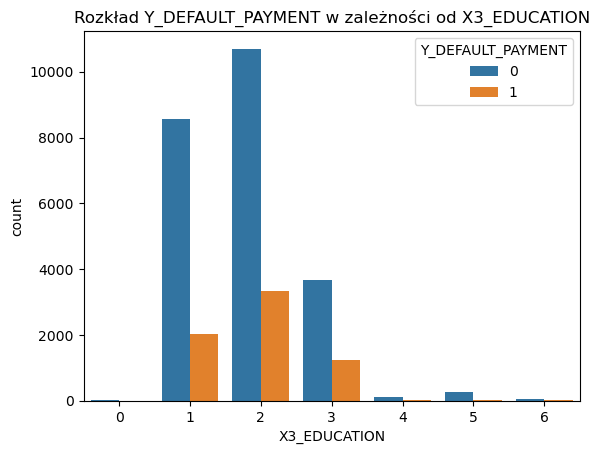


X3_EDUCATION = 0:
        X1_LIMIT_BAL     X5_AGE
count      14.000000  14.000000
mean   217142.857143  38.857143
std     86596.195638   7.241516
min     50000.000000  28.000000
25%    170000.000000  35.000000
50%    215000.000000  38.500000
75%    265000.000000  43.750000
max    360000.000000  53.000000

X3_EDUCATION = 1:
        X1_LIMIT_BAL        X5_AGE
count    10585.00000  10585.000000
mean    212956.06991     34.231838
std     135474.93673      8.270266
min      10000.00000     21.000000
25%     100000.00000     28.000000
50%     200000.00000     32.000000
75%     300000.00000     39.000000
max    1000000.00000     79.000000

X3_EDUCATION = 2:
        X1_LIMIT_BAL        X5_AGE
count   14030.000000  14030.000000
mean   147062.437634     34.722096
std    120672.282033      8.893848
min     10000.000000     21.000000
25%     50000.000000     27.000000
50%    110000.000000     33.000000
75%    210000.000000     41.000000
max    800000.000000     75.000000

X3_EDUCATION = 3:
      

In [8]:
## rozkład Y_DEFAULT_PAYMENT dla każdej kategorii w X3_EDUCATION
for category in dataframe_prepared['X3_EDUCATION'].cat.categories:
    subset = dataframe_prepared[dataframe_prepared['X3_EDUCATION'] == category]
    default_rate = subset['Y_DEFAULT_PAYMENT'].value_counts(normalize=True)
    print(f"\nX3_EDUCATION = {category}:")
    print(default_rate)

## wizualizacja zależności X3_EDUCATION i Y_DEFAULT_PAYMENT
sns.countplot(x='X3_EDUCATION', hue='Y_DEFAULT_PAYMENT', data=dataframe_prepared)
plt.title("Rozkład Y_DEFAULT_PAYMENT w zależności od X3_EDUCATION")
plt.show()

## statystyki innych zmiennych (np. X1_LIMIT_BAL, X5_AGE) dla kategorii X3_EDUCATION
for category in dataframe_prepared['X3_EDUCATION'].cat.categories:
    subset = dataframe_prepared[dataframe_prepared['X3_EDUCATION'] == category]
    print(f"\nX3_EDUCATION = {category}:")
    print(subset[['X1_LIMIT_BAL', 'X5_AGE']].describe())

In [9]:
"""

na podstawie danych i obserwacji, że kategorie 4 i 5 mają podobny rozkład Y_DEFAULT_PAYMENT i statystyki X1_LIMIT_BAL, X5_AGE, 
a kategorie 0 i 6 są zbyt rzadkie, by uzasadniać ich pozostawienie jako oddzielne kategorie
zamieniamy nieudokumentowne (nie ma ich w opisie) kategorie 0, 5, 6 na kategorie 4 = others w X3_EDUCATION

"""


class AdjustX3EducationCategories(BaseEstimator, TransformerMixin):
    def __init__(self, target_column='X3_EDUCATION', categories_to_replace=[0, 5, 6], replacement_category=4):
        """
        Inicjalizacja transformera do zmiany kategorii w X3_EDUCATION.
        
        Parameters:
        - target_column (str): Nazwa kolumny do przetworzenia (domyślnie 'X3_EDUCATION').
        - categories_to_replace (list): Lista kategorii do zastąpienia (domyślnie [0, 5, 6]).
        - replacement_category (int): Kategoria zastępująca (domyślnie 4).
        """
        self.target_column = target_column
        self.categories_to_replace = categories_to_replace
        self.replacement_category = replacement_category

    def fit(self, X, y=None):
        ## sprawdzamy, czy kolumna istnieje
        if self.target_column not in X.columns:
            raise ValueError(f"Kolumna {self.target_column} nie istnieje w danych.")
        return self

    def transform(self, X, y=None):
        ## tworzenie kopii, aby nie modyfikować oryginalnych danych
        df_transformed = X.copy()
        
        ## zamiana kategorii
        if self.target_column in df_transformed.columns:
            mask = df_transformed[self.target_column].isin(self.categories_to_replace)
            df_transformed.loc[mask, self.target_column] = self.replacement_category
        
        ## konwersja na kategorie i usunięcie nieużywanych
        if self.target_column in df_transformed.columns:
            df_transformed[self.target_column] = df_transformed[self.target_column].astype('category')
            df_transformed[self.target_column] = df_transformed[self.target_column].cat.remove_unused_categories()
        
        return df_transformed


## aktualizacja pipeline
steps = [
    ('prepare_column_and_index', PrepareColumnAndIndex(
        index_col='ID',
        new_column_names=new_columns,
        categorical_columns=categorical_columns
    )),
    ('adjust_x3_education_categories', AdjustX3EducationCategories(
        target_column='X3_EDUCATION',
        categories_to_replace=[0, 5, 6],
        replacement_category=4
    ))
]
data_preparation_pipeline = Pipeline(steps=steps)


## transformacja
dataframe_prepared = data_preparation_pipeline.fit_transform(dataframe)


print(dataframe_prepared.dtypes)

X1_LIMIT_BAL            int64
X2_SEX               category
X3_EDUCATION         category
X4_MARRIAGE          category
X5_AGE                  int64
X6_PAY_SEP           category
X7_PAY_AUG           category
X8_PAY_JUL           category
X9_PAY_JUN           category
X10_PAY_MAY          category
X11_PAY_APR          category
X12_BILL_AMT_SEP        int64
X13_BILL_AMT_AUG        int64
X14_BILL_AMT_JUL        int64
X15_BILL_AMT_JUN        int64
X16_BILL_AMT_MAY        int64
X17_BILL_AMT_APR        int64
X18_PAY_AMT_SEP         int64
X19_PAY_AMT_AUG         int64
X20_PAY_AMT_JUL         int64
X21_PAY_AMT_JUN         int64
X22_PAY_AMT_MAY         int64
X23_PAY_AMT_APR         int64
Y_DEFAULT_PAYMENT    category
dtype: object


In [10]:
print(dataframe_prepared['X3_EDUCATION'].value_counts())

print("\nRozkład Y_DEFAULT_PAYMENT dla połączonej kategorii 4:")
subset = dataframe_prepared[dataframe_prepared['X3_EDUCATION'] == 4]
print(subset['Y_DEFAULT_PAYMENT'].value_counts(normalize=True))

X3_EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

Rozkład Y_DEFAULT_PAYMENT dla połączonej kategorii 4:
Y_DEFAULT_PAYMENT
0    0.929487
1    0.070513
Name: proportion, dtype: float64



X4_MARRIAGE = 0:
Y_DEFAULT_PAYMENT
0    0.907407
1    0.092593
Name: proportion, dtype: float64

X4_MARRIAGE = 1:
Y_DEFAULT_PAYMENT
0    0.765283
1    0.234717
Name: proportion, dtype: float64

X4_MARRIAGE = 2:
Y_DEFAULT_PAYMENT
0    0.790717
1    0.209283
Name: proportion, dtype: float64

X4_MARRIAGE = 3:
Y_DEFAULT_PAYMENT
0    0.739938
1    0.260062
Name: proportion, dtype: float64


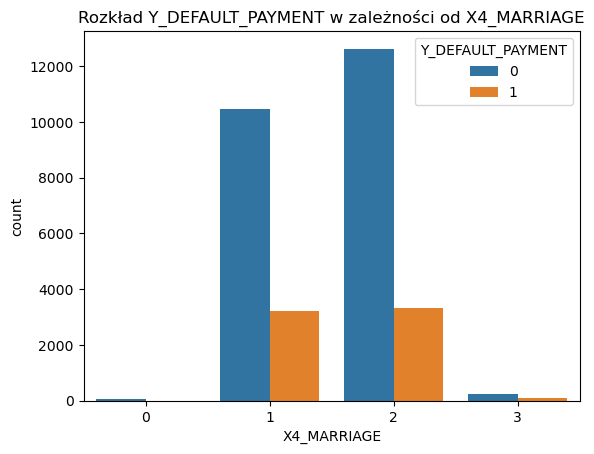


X4_MARRIAGE = 0:
        X1_LIMIT_BAL     X5_AGE
count      54.000000  54.000000
mean   132962.962963  37.814815
std     84331.547615   8.702795
min     10000.000000  23.000000
25%     70000.000000  31.000000
50%    115000.000000  37.000000
75%    200000.000000  45.000000
max    360000.000000  56.000000

X4_MARRIAGE = 1:
         X1_LIMIT_BAL        X5_AGE
count    13659.000000  13659.000000
mean    182200.893184     40.016692
std     133382.262668      8.720326
min      10000.000000     21.000000
25%      70000.000000     34.000000
50%     160000.000000     39.000000
75%     260000.000000     46.000000
max    1000000.000000     79.000000

X4_MARRIAGE = 2:
        X1_LIMIT_BAL        X5_AGE
count   15964.000000  15964.000000
mean   156413.660737     31.452706
std    125673.426316      7.592002
min     10000.000000     21.000000
25%     50000.000000     26.000000
50%    130000.000000     29.000000
75%    220000.000000     35.000000
max    800000.000000     70.000000

X4_MARRIAGE = 3:
 

In [11]:
## rozkład Y_DEFAULT_PAYMENT dla każdej kategorii w X4_MARRIAGE
for category in dataframe_prepared['X4_MARRIAGE'].cat.categories:
    subset = dataframe_prepared[dataframe_prepared['X4_MARRIAGE'] == category]
    default_rate = subset['Y_DEFAULT_PAYMENT'].value_counts(normalize=True)
    print(f"\nX4_MARRIAGE = {category}:")
    print(default_rate)

## wizualizacja zależności X4_MARRIAGE i Y_DEFAULT_PAYMENT
sns.countplot(x='X4_MARRIAGE', hue='Y_DEFAULT_PAYMENT', data=dataframe_prepared)
plt.title("Rozkład Y_DEFAULT_PAYMENT w zależności od X4_MARRIAGE")
plt.show()

## statystyki innych zmiennych (np. X1_LIMIT_BAL, X5_AGE) dla kategorii X4_MARRIAGE
for category in dataframe_prepared['X4_MARRIAGE'].cat.categories:
    subset = dataframe_prepared[dataframe_prepared['X4_MARRIAGE'] == category]
    print(f"\nX4_MARRIAGE = {category}:")
    print(subset[['X1_LIMIT_BAL', 'X5_AGE']].describe())

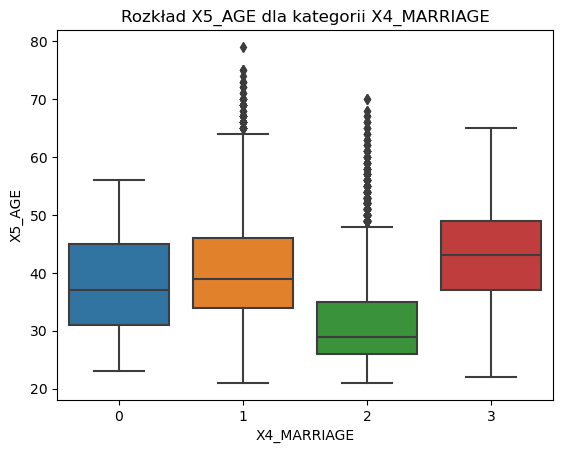

count    54.000000
mean     37.814815
std       8.702795
min      23.000000
25%      31.000000
50%      37.000000
75%      45.000000
max      56.000000
Name: X5_AGE, dtype: float64


In [12]:
## wizualizacja rozkładu X5_AGE dla każdej kategorii X4_MARRIAGE
sns.boxplot(x='X4_MARRIAGE', y='X5_AGE', data=dataframe_prepared)
plt.title("Rozkład X5_AGE dla kategorii X4_MARRIAGE")
plt.show()

## statystyki X5_AGE dla kategorii 0 (X4_MARRIAGE)
print(dataframe_prepared[dataframe_prepared['X4_MARRIAGE'] == 0]['X5_AGE'].describe())

In [13]:
"""

decyzja odnosnie nieudokumentowanej kategorii 0 dla cechy X4_MARRIAGE --> Kategoria 0 w X4_MARRIAGE została przypisana 
do 1 lub 2 na podstawie progu wieku 35 lat (age_threshold = 35); 
wykorzystuje zależności w danych (wiek vs. status cywilny) 
i minimalizuje szum w porównaniu do arbitralnego przypisania do kategorii 3 
(Ochrona kategorii 3 ktora ma tylko 323 obserwacje 
i wyższy odsetek defaultów (26.01%) i inny profil demograficzny niż kat. 0); 
zwiększenie liczby obserwacji w 1 i 2 (o 34 i 20) jest proporcjonalne do ich liczebności (13,659 i 15,964),
więc nie zaburza ogólnego rozkładu

"""

## propozycja imputacji na podstawie wieku
### jeśli wiek < 35, przypisz 2 (single) i jeśli ≥ 35, przypisz 1 (married)
#### age_threshold = 35  --> na podstawie mediany dla kategorii 2 (29) i 1 (39) oraz Q3 (75%) dla kat. 2 (single)

class AdjustX4MarriageCategories(BaseEstimator, TransformerMixin):
    def __init__(self, marriage_column='X4_MARRIAGE', age_column='X5_AGE', age_threshold=35):
        """
        Inicjalizacja transformera do zmiany kategorii w X4_MARRIAGE na podstawie wieku.
        
        Parameters:
        - marriage_column (str): Nazwa kolumny z statusem cywilnym (domyślnie 'X4_MARRIAGE').
        - age_column (str): Nazwa kolumny z wiekiem (domyślnie 'X5_AGE').
        - age_threshold (int): Próg wieku do przypisania kategorii (domyślnie 35).
        """
        self.marriage_column = marriage_column
        self.age_column = age_column
        self.age_threshold = age_threshold

    def fit(self, X, y=None):
        # sprawdzamy, czy kolumny istnieją
        if self.marriage_column not in X.columns or self.age_column not in X.columns:
            raise ValueError("Brak wymaganych kolumn w danych.")
        return self

    def transform(self, X, y=None):
        # tworzenie kopii, aby nie modyfikować oryginalnych danych
        df_transformed = X.copy()
        
        # przypisanie kategorii 0 na podstawie wieku
        if self.marriage_column in df_transformed.columns and self.age_column in df_transformed.columns:
            mask_zero = df_transformed[self.marriage_column] == 0
            df_transformed.loc[mask_zero & (df_transformed[self.age_column] < self.age_threshold), self.marriage_column] = 2
            df_transformed.loc[mask_zero & (df_transformed[self.age_column] >= self.age_threshold), self.marriage_column] = 1
        
        # konwersja na kategorie i usunięcie nieużywanych
        if self.marriage_column in df_transformed.columns:
            df_transformed[self.marriage_column] = df_transformed[self.marriage_column].astype('category')
            df_transformed[self.marriage_column] = df_transformed[self.marriage_column].cat.remove_unused_categories()
        
        return df_transformed


## aktualizacja pipeline
steps = [
    ('prepare_column_and_index', PrepareColumnAndIndex(
        index_col='ID',
        new_column_names=new_columns,
        categorical_columns=categorical_columns
    )),
    ('adjust_x3_education_categories', AdjustX3EducationCategories(
        target_column='X3_EDUCATION',
        categories_to_replace=[0, 5, 6],
        replacement_category=4
    )),
    ('adjust_x4_marriage_categories', AdjustX4MarriageCategories(
        marriage_column='X4_MARRIAGE',
        age_column='X5_AGE',
        age_threshold=35
    ))
]
data_preparation_pipeline = Pipeline(steps=steps)


## transformacja
dataframe_prepared = data_preparation_pipeline.fit_transform(dataframe)


print(dataframe_prepared.dtypes)

X1_LIMIT_BAL            int64
X2_SEX               category
X3_EDUCATION         category
X4_MARRIAGE          category
X5_AGE                  int64
X6_PAY_SEP           category
X7_PAY_AUG           category
X8_PAY_JUL           category
X9_PAY_JUN           category
X10_PAY_MAY          category
X11_PAY_APR          category
X12_BILL_AMT_SEP        int64
X13_BILL_AMT_AUG        int64
X14_BILL_AMT_JUL        int64
X15_BILL_AMT_JUN        int64
X16_BILL_AMT_MAY        int64
X17_BILL_AMT_APR        int64
X18_PAY_AMT_SEP         int64
X19_PAY_AMT_AUG         int64
X20_PAY_AMT_JUL         int64
X21_PAY_AMT_JUN         int64
X22_PAY_AMT_MAY         int64
X23_PAY_AMT_APR         int64
Y_DEFAULT_PAYMENT    category
dtype: object


In [14]:
# sprawdzenie nowego rozkładu X4_MARRIAGE po imputacji na podstawie wieku
print(dataframe_prepared['X4_MARRIAGE'].value_counts())

## sprawdzenie nowego rozkładu Y_DEFAULT_PAYMENT dla kategorii 1 i 2 po imputacji na podstawie wieku
for cat in [1, 2]:
    subset = dataframe_prepared[dataframe_prepared['X4_MARRIAGE'] == cat]
    print(f"\nX4_MARRIAGE = {cat}:")
    print(subset['Y_DEFAULT_PAYMENT'].value_counts(normalize=True))

X4_MARRIAGE
2    15984
1    13693
3      323
Name: count, dtype: int64

X4_MARRIAGE = 1:
Y_DEFAULT_PAYMENT
0    0.765647
1    0.234353
Name: proportion, dtype: float64

X4_MARRIAGE = 2:
Y_DEFAULT_PAYMENT
0    0.790853
1    0.209147
Name: proportion, dtype: float64


In [15]:
## lista zmiennych płatności
pay_columns = ['X6_PAY_SEP', 'X7_PAY_AUG', 'X8_PAY_JUL', 'X9_PAY_JUN', 'X10_PAY_MAY', 'X11_PAY_APR']


## rozkład Y_DEFAULT_PAYMENT dla kategorii -2 i 0 (nieudokumentowanych w opisie - błędy) oraz udokumentowanej -1
print("Rozkład Y_DEFAULT_PAYMENT dla kategorii nieudokumentowanych -2 i 0 oraz udokumentowanej kat. -1:")
for col in pay_columns:
    print(f"\n{col}:")
    for category in [-2, -1, 0]:
        subset = dataframe_prepared[dataframe_prepared[col] == category]
        if not subset.empty:
            print(f"  Kategoria {category}:")
            print(subset['Y_DEFAULT_PAYMENT'].value_counts(normalize=True))

Rozkład Y_DEFAULT_PAYMENT dla kategorii nieudokumentowanych -2 i 0 oraz udokumentowanej kat. -1:

X6_PAY_SEP:
  Kategoria -2:
Y_DEFAULT_PAYMENT
0    0.867706
1    0.132294
Name: proportion, dtype: float64
  Kategoria -1:
Y_DEFAULT_PAYMENT
0    0.832219
1    0.167781
Name: proportion, dtype: float64
  Kategoria 0:
Y_DEFAULT_PAYMENT
0    0.871887
1    0.128113
Name: proportion, dtype: float64

X7_PAY_AUG:
  Kategoria -2:
Y_DEFAULT_PAYMENT
0    0.817292
1    0.182708
Name: proportion, dtype: float64
  Kategoria -1:
Y_DEFAULT_PAYMENT
0    0.840331
1    0.159669
Name: proportion, dtype: float64
  Kategoria 0:
Y_DEFAULT_PAYMENT
0    0.840877
1    0.159123
Name: proportion, dtype: float64

X8_PAY_JUL:
  Kategoria -2:
Y_DEFAULT_PAYMENT
0    0.814688
1    0.185312
Name: proportion, dtype: float64
  Kategoria -1:
Y_DEFAULT_PAYMENT
0    0.844055
1    0.155945
Name: proportion, dtype: float64
  Kategoria 0:
Y_DEFAULT_PAYMENT
0    0.825488
1    0.174512
Name: proportion, dtype: float64

X9_PAY_JUN:


Statystyki dla X6_PAY_SEP (kategorie -2 i 0):

  Kategoria -2:
       X12_BILL_AMT_SEP  X18_PAY_AMT_SEP   X1_LIMIT_BAL       X5_AGE
count       2759.000000      2759.000000    2759.000000  2759.000000
mean        8793.052555      6477.920261  250391.446176    36.969192
std        28224.565390     20877.338447  126986.003063     8.619976
min       -15308.000000         0.000000   10000.000000    21.000000
25%            0.000000         0.000000  160000.000000    30.000000
50%         1179.000000      1131.000000  230000.000000    36.000000
75%         5819.000000      5000.000000  340000.000000    42.000000
max       478030.000000    368199.000000  800000.000000    73.000000

  Kategoria 0:
       X12_BILL_AMT_SEP  X18_PAY_AMT_SEP    X1_LIMIT_BAL        X5_AGE
count      14737.000000     14737.000000    14737.000000  14737.000000
mean       78417.889462      6082.560019   154265.025446     34.976250
std        82054.920294     14132.201296   126832.537271      9.283228
min          26

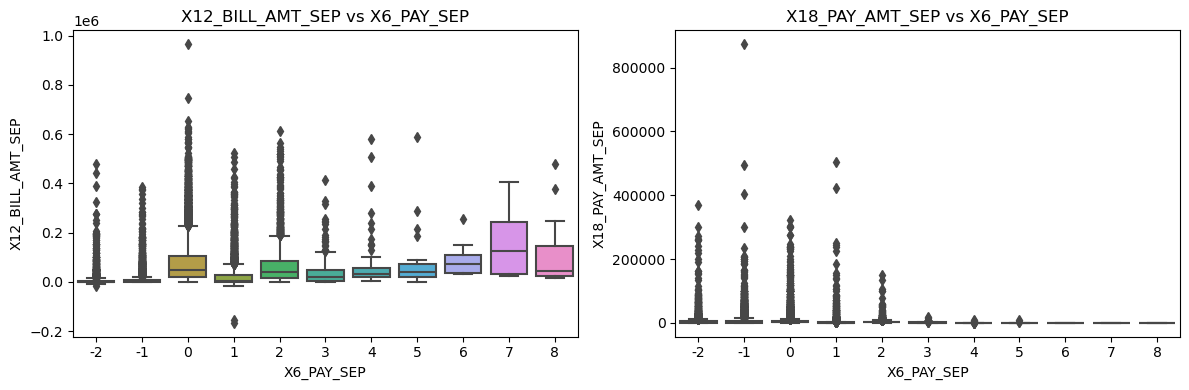

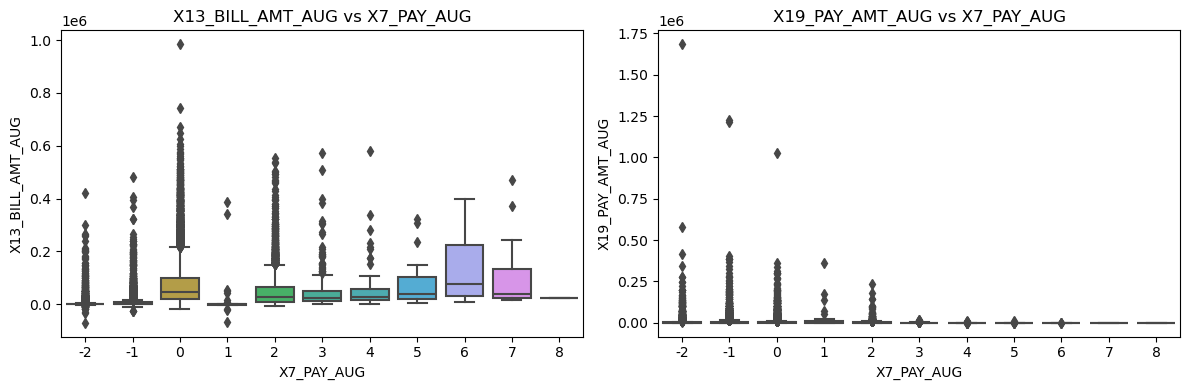

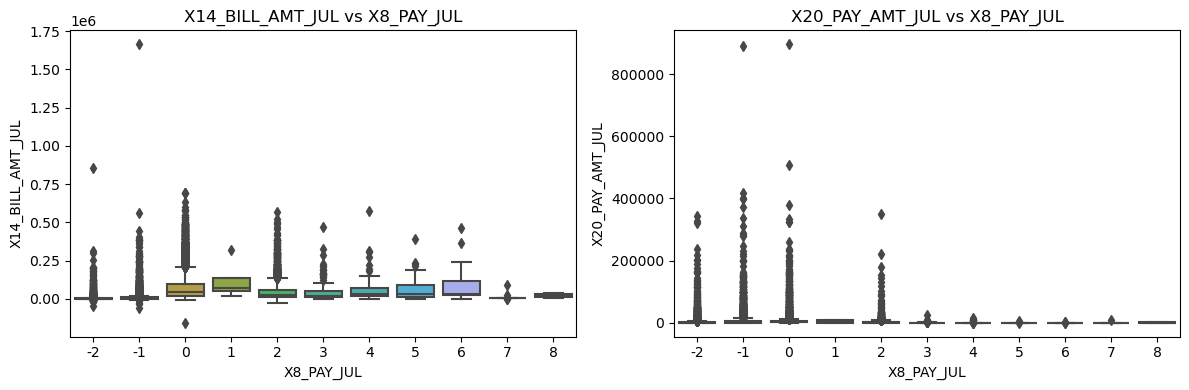

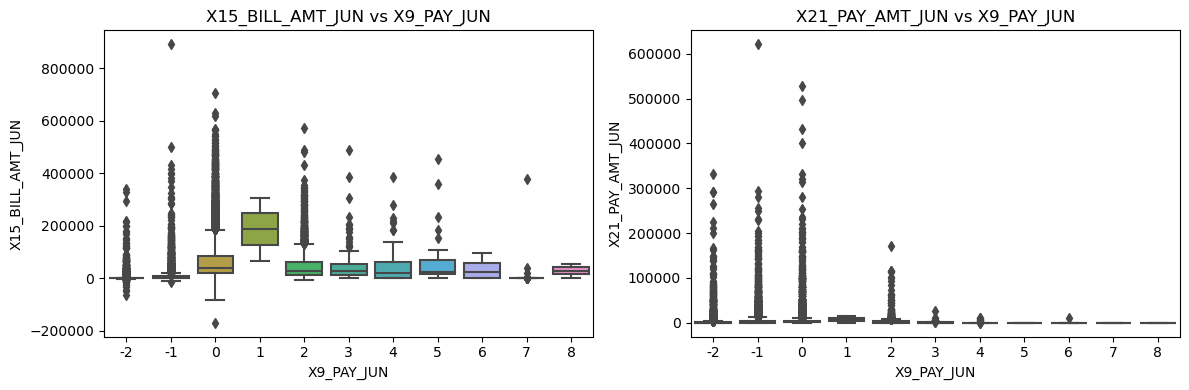

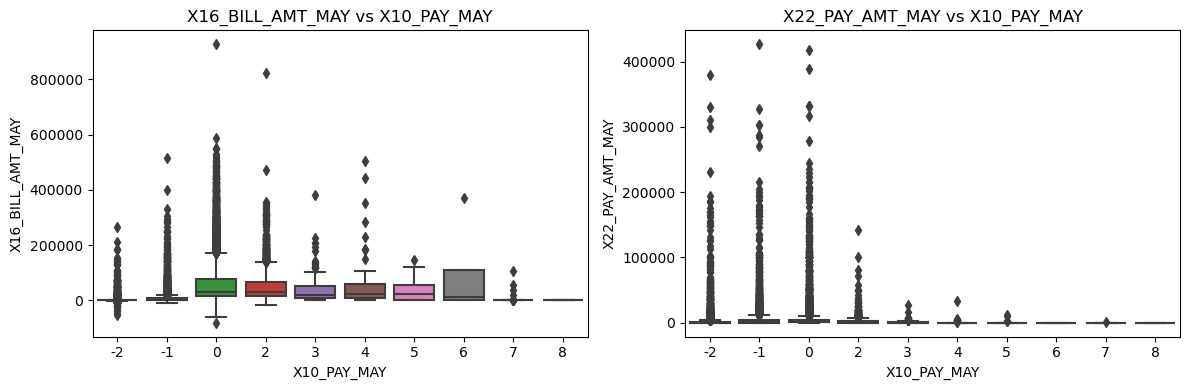

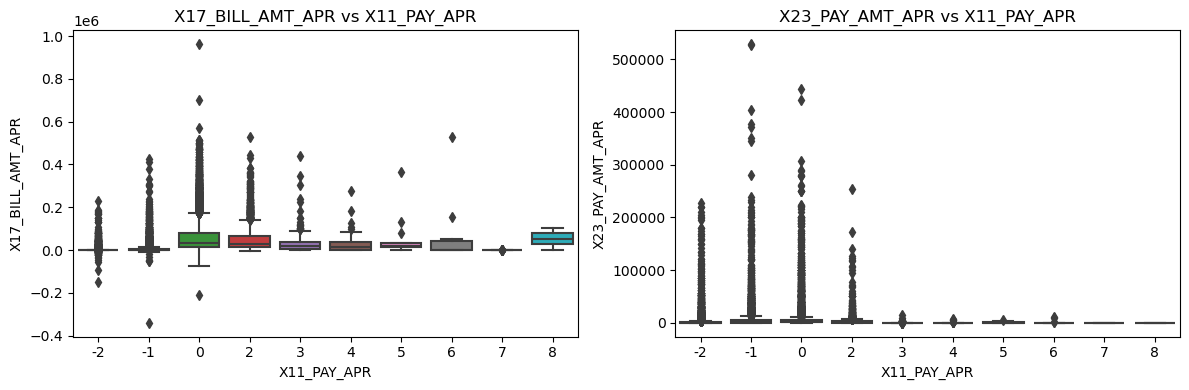

In [16]:
## statystyka dla cech numerycznych dla kategorii -2 i 0 nieudokumentowanych w opisie
numeric_cols = ['X1_LIMIT_BAL', 'X5_AGE'] + [f'X{i}_BILL_AMT_{month}' for i, month in zip(range(12, 18), ['SEP', 'AUG', 'JUL', 'JUN', 'MAY', 'APR'])] + [f'X{i}_PAY_AMT_{month}' for i, month in zip(range(18, 24), ['SEP', 'AUG', 'JUL', 'JUN', 'MAY', 'APR'])]


for col in pay_columns:
    month = col.split('_')[2]
    bill_col = f'X{int(col.split("_")[0][1:]) + 6}_BILL_AMT_{month}'
    pay_amt_col = f'X{int(col.split("_")[0][1:]) + 12}_PAY_AMT_{month}'
    print(f"\nStatystyki dla {col} (kategorie -2 i 0):")
    for category in [-2, 0]:
        subset = dataframe_prepared[dataframe_prepared[col] == category]
        if not subset.empty:
            print(f"\n  Kategoria {category}:")
            print(subset[[bill_col, pay_amt_col, 'X1_LIMIT_BAL', 'X5_AGE']].describe())


## wizualizacja rozkładu BILL_AMT i PAY_AMT dla kategorii -2 i 0
for col in pay_columns:
    month = col.split('_')[2]
    bill_col = f'X{int(col.split("_")[0][1:]) + 6}_BILL_AMT_{month}'
    pay_amt_col = f'X{int(col.split("_")[0][1:]) + 12}_PAY_AMT_{month}'
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=col, y=bill_col, data=dataframe_prepared)
    plt.title(f'{bill_col} vs {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=col, y=pay_amt_col, data=dataframe_prepared)
    plt.title(f'{pay_amt_col} vs {col}')
    plt.tight_layout()
    plt.show()

In [17]:
## analiza kategorii 8 dla X6_PAY_SEP–X11_PAY_APR
for col in ['X6_PAY_SEP', 'X7_PAY_AUG', 'X8_PAY_JUL', 'X9_PAY_JUN', 'X10_PAY_MAY', 'X11_PAY_APR']:
    month = col.split('_')[2]
    bill_col = f'X{int(col.split("_")[0][1:]) + 6}_BILL_AMT_{month}'
    subset = dataframe_prepared[dataframe_prepared[col] == 8]
    if not subset.empty:
        print(f"\n{col} (kategoria 8):")
        print("Rozkład Y_DEFAULT_PAYMENT:")
        print(subset['Y_DEFAULT_PAYMENT'].value_counts(normalize=True))
        print(f"Statystyki {bill_col}:")
        print(subset[bill_col].describe())


X6_PAY_SEP (kategoria 8):
Rozkład Y_DEFAULT_PAYMENT:
Y_DEFAULT_PAYMENT
1    0.578947
0    0.421053
Name: proportion, dtype: float64
Statystyki X12_BILL_AMT_SEP:
count        19.000000
mean     113754.000000
std      130118.491254
min       16942.000000
25%       24329.000000
50%       43340.000000
75%      144177.500000
max      477094.000000
Name: X12_BILL_AMT_SEP, dtype: float64

X7_PAY_AUG (kategoria 8):
Rozkład Y_DEFAULT_PAYMENT:
Y_DEFAULT_PAYMENT
0    1.0
1    0.0
Name: proportion, dtype: float64
Statystyki X13_BILL_AMT_AUG:
count        1.0
mean     25589.0
std          NaN
min      25589.0
25%      25589.0
50%      25589.0
75%      25589.0
max      25589.0
Name: X13_BILL_AMT_AUG, dtype: float64

X8_PAY_JUL (kategoria 8):
Rozkład Y_DEFAULT_PAYMENT:
Y_DEFAULT_PAYMENT
1    0.666667
0    0.333333
Name: proportion, dtype: float64
Statystyki X14_BILL_AMT_JUL:
count        3.000000
mean     20454.000000
std      17360.507251
min       2400.000000
25%      12168.000000
50%      21936.0

<Figure size 1200x600 with 0 Axes>

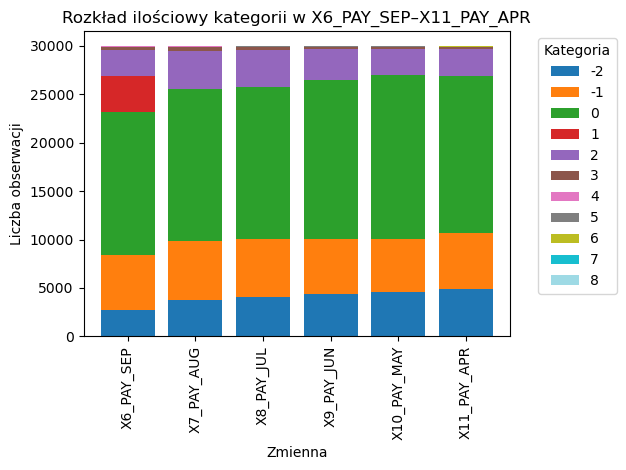

Liczności kategorii dla każdej zmiennej:

X6_PAY_SEP:
X6_PAY_SEP
-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: count, dtype: int64

X7_PAY_AUG:
X7_PAY_AUG
-2     3782
-1     6050
 0    15730
 1       28
 2     3927
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
Name: count, dtype: int64

X8_PAY_JUL:
X8_PAY_JUL
-2     4085
-1     5938
 0    15764
 1        4
 2     3819
 3      240
 4       76
 5       21
 6       23
 7       27
 8        3
Name: count, dtype: int64

X9_PAY_JUN:
X9_PAY_JUN
-2     4348
-1     5687
 0    16455
 1        2
 2     3159
 3      180
 4       69
 5       35
 6        5
 7       58
 8        2
Name: count, dtype: int64

X10_PAY_MAY:
X10_PAY_MAY
-2     4546
-1     5539
 0    16947
 2     2626
 3      178
 4       84
 5       17
 6        4
 7       58
 8        1
Name: count, dtype: int64

X11_PAY_APR:
X11_PAY_APR
-2     4895
-1     5740
 0    162

In [18]:
## przygotowanie danych do wizualizacji
category_counts = {}
for col in pay_columns:
    category_counts[col] = dataframe_prepared[col].value_counts().sort_index()

## tworzenie ramki danych z licznościami
counts_df = pd.DataFrame(category_counts).fillna(0).T

## wizualizacja - stacked bar plot
plt.figure(figsize=(12, 6))
counts_df.plot(kind='bar', stacked=True, colormap='tab20', width=0.8)
plt.title('Rozkład ilościowy kategorii w X6_PAY_SEP–X11_PAY_APR')
plt.xlabel('Zmienna')
plt.ylabel('Liczba obserwacji')
plt.legend(title='Kategoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## wyświetlenie liczności dla każdej kategorii pay_columns
print("Liczności kategorii dla każdej zmiennej:")
for col in pay_columns:
    print(f"\n{col}:")
    print(dataframe_prepared[col].value_counts().sort_index())

In [19]:
"""

Kategorie -2 i 0 zachowujemy jako osobne kategorie, bo są pewne różnice w Y_DEFAULT_PAYMENT 
i statystykach BILL_AMT/PAY_AMT sugerują, że wnoszą unikalną informację.
-2 prawdopodobnie oznacza „przedpłatę” (zerowe/ujemne rachunki, niskie spłaty), a 0 „brak wymaganej płatności” (niskie, ale dodatnie rachunki).
Potwierdzono, że kategoria 8 jest rzadka (1–19 obserwacji) i nie wydaje się substytutem 9 (rachunki nie są ekstremalnie wysokie). 
Brak kategorii 9 to prawdopodobnie cecha danych, więc nie wymaga korekty.

"""

## EDA ##
features = ['X1_LIMIT_BAL','X2_SEX','X3_EDUCATION','X4_MARRIAGE','X5_AGE','X6_PAY_SEP','X7_PAY_AUG','X8_PAY_JUL','X9_PAY_JUN','X10_PAY_MAY','X11_PAY_APR','X12_BILL_AMT_SEP','X13_BILL_AMT_AUG','X14_BILL_AMT_JUL','X15_BILL_AMT_JUN','X16_BILL_AMT_MAY','X17_BILL_AMT_APR','X18_PAY_AMT_SEP','X19_PAY_AMT_AUG','X20_PAY_AMT_JUL','X21_PAY_AMT_JUN','X22_PAY_AMT_MAY','X23_PAY_AMT_APR']
target = 'Y_DEFAULT_PAYMENT'


dataframe_prepared[features].describe()

X1_LIMIT_BAL        X5_AGE  X12_BILL_AMT_SEP  X13_BILL_AMT_AUG  \
count    30000.000000  30000.000000      30000.000000      30000.000000   
mean    167484.322667     35.485500      51223.330900      49179.075167   
std     129747.661567      9.217904      73635.860576      71173.768783   
min      10000.000000     21.000000    -165580.000000     -69777.000000   
25%      50000.000000     28.000000       3558.750000       2984.750000   
50%     140000.000000     34.000000      22381.500000      21200.000000   
75%     240000.000000     41.000000      67091.000000      64006.250000   
max    1000000.000000     79.000000     964511.000000     983931.000000   

       X14_BILL_AMT_JUL  X15_BILL_AMT_JUN  X16_BILL_AMT_MAY  X17_BILL_AMT_APR  \
count      3.000000e+04      30000.000000      30000.000000      30000.000000   
mean       4.701315e+04      43262.948967      40311.400967      38871.760400   
std        6.934939e+04      64332.856134      60797.155770      59554.107537   
min       -1.572640e+05    -170000.000000     -81334.000000    -339603.000000   
25%        2.666250e+03       2326.750000       1763.000000       1256.000000   
50%        2.008850e+04      19052.000000      18104.500000      17071.000000   
75%        6.016475e+04      54506.000000      50190.500000      49198.250000   
max        1.664089e+06     891586.000000     927171.000000     961664.000000   

       X18_PAY_AMT_SEP  X19_PAY_AMT_AUG  X20_PAY_AMT_JUL  X21_PAY_AMT_JUN  \
count     30000.000000     3.000000e+04      30000.00000     30000.000000   
mean       5663.580500     5.921163e+03       5225.68150      4826.076867   
std       16563.280354     2.304087e+04      17606.96147     15666.159744   
min           0.000000     0.000000e+00          0.00000         0.000000   
25%        1000.000000     8.330000e+02        390.00000       296.000000   
50%        2100.000000     2.009000e+03       1800.00000      1500.000000   
75%        5006.000000     5.000000e+03       4505.00000      4013.250000   
max      873552.000000     1.684259e+06     896040.00000    621000.000000   

       X22_PAY_AMT_MAY  X23_PAY_AMT_APR  
count     30000.000000     30000.000000  
mean       4799.387633      5215.502567  
std       15278.305679     17777.465775  
min           0.000000         0.000000  
25%         252.500000       117.750000  
50%        1500.000000      1500.000000  
75%        4031.500000      4000.000000  
max      426529.000000    528666.000000

In [20]:
pd.Series(dataframe_prepared[target]).value_counts(normalize=True)

Y_DEFAULT_PAYMENT
0    0.7788
1    0.2212
Name: proportion, dtype: float64

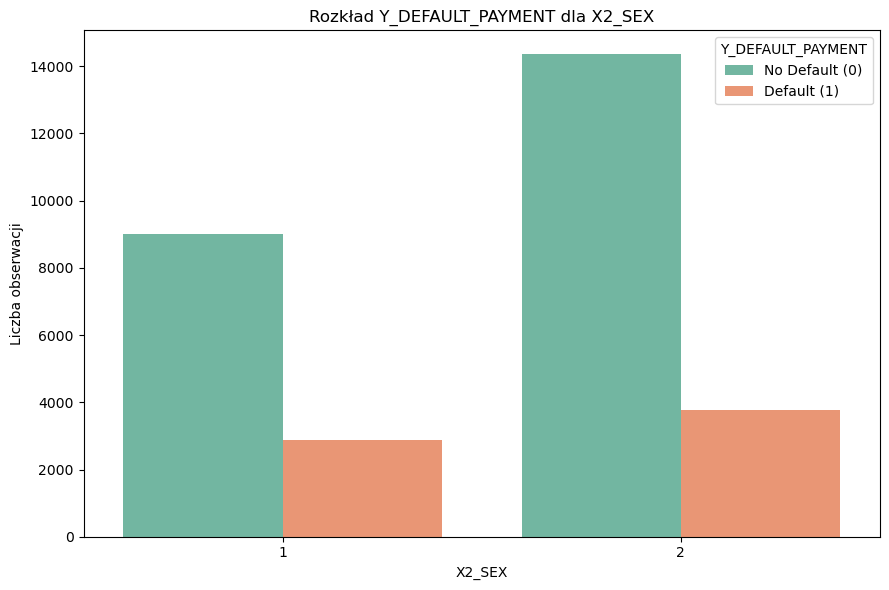

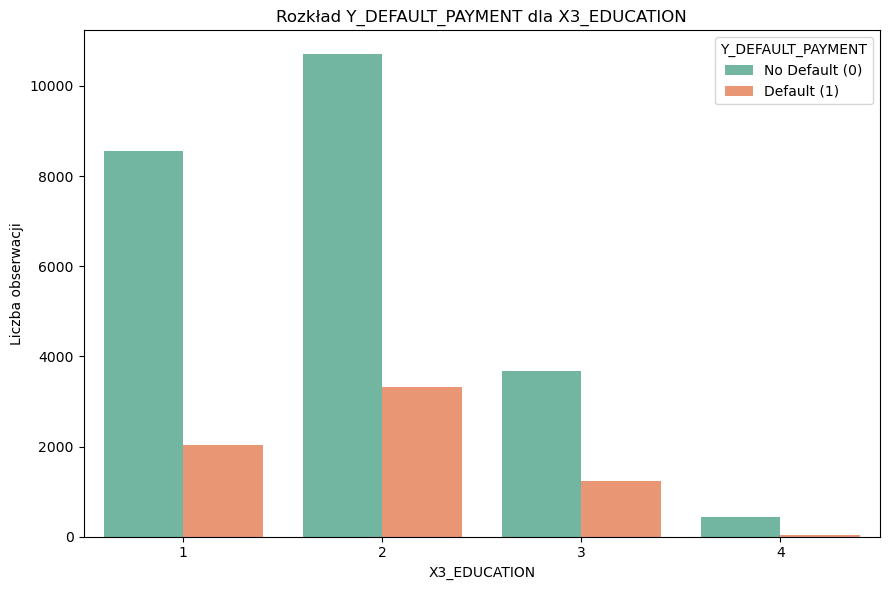

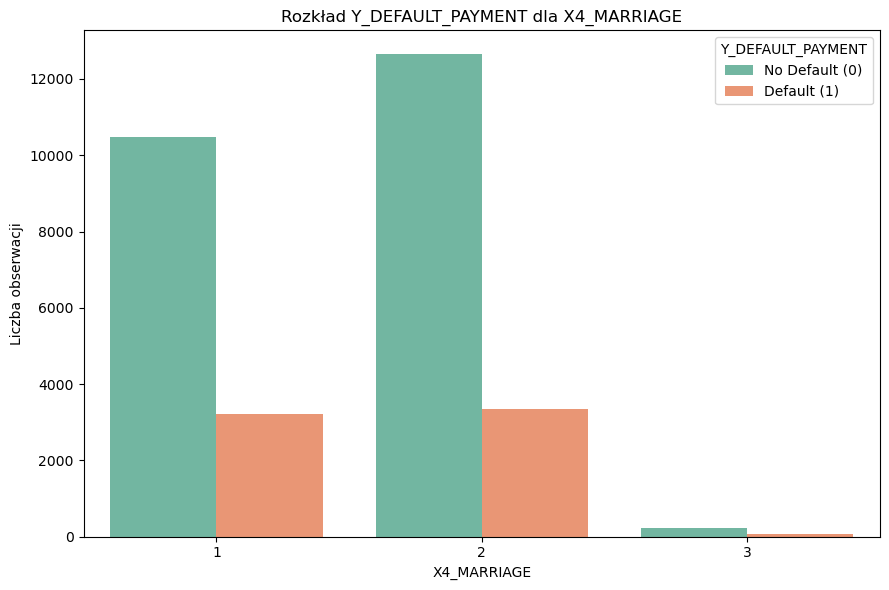

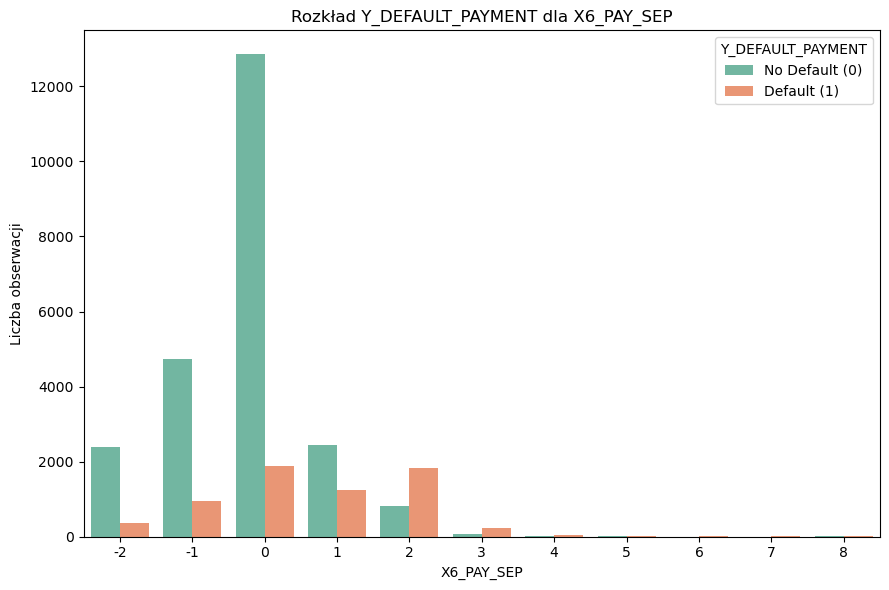

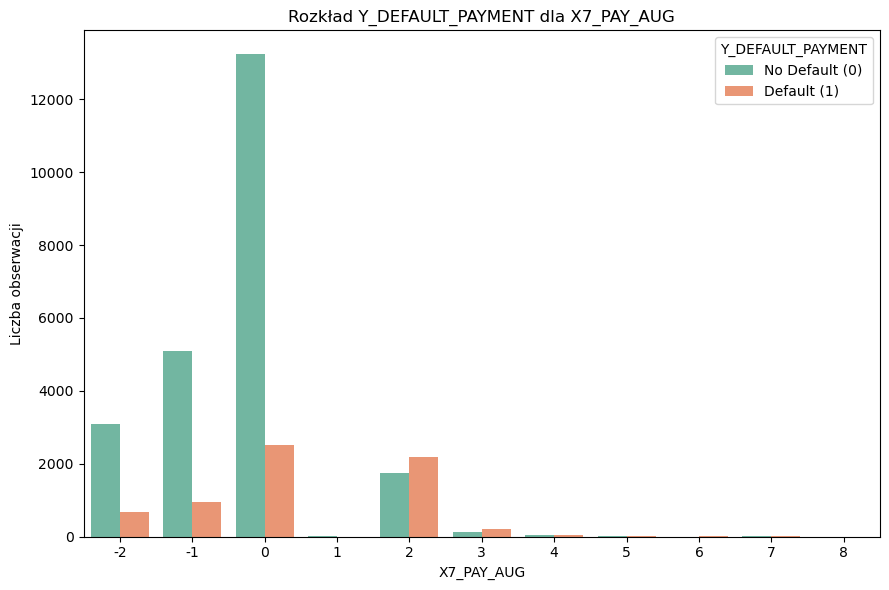

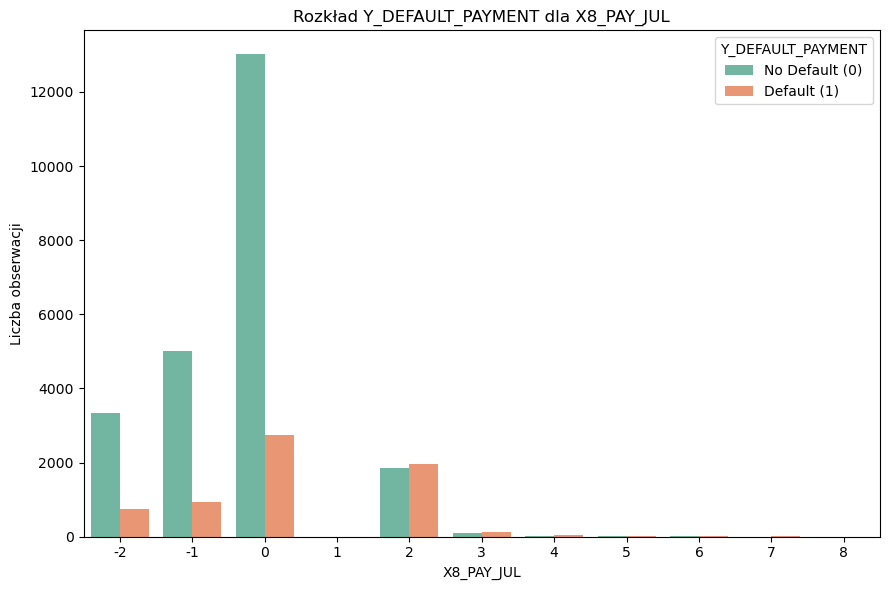

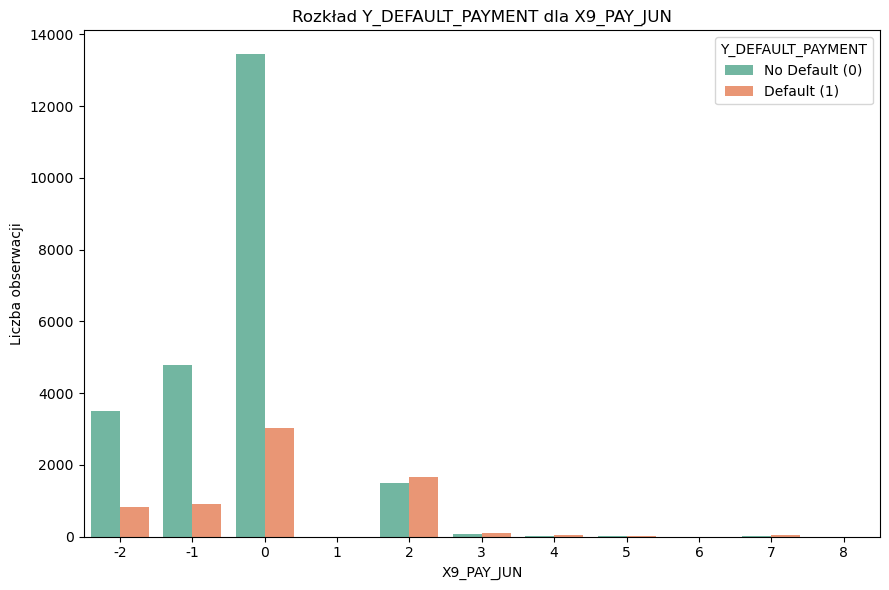

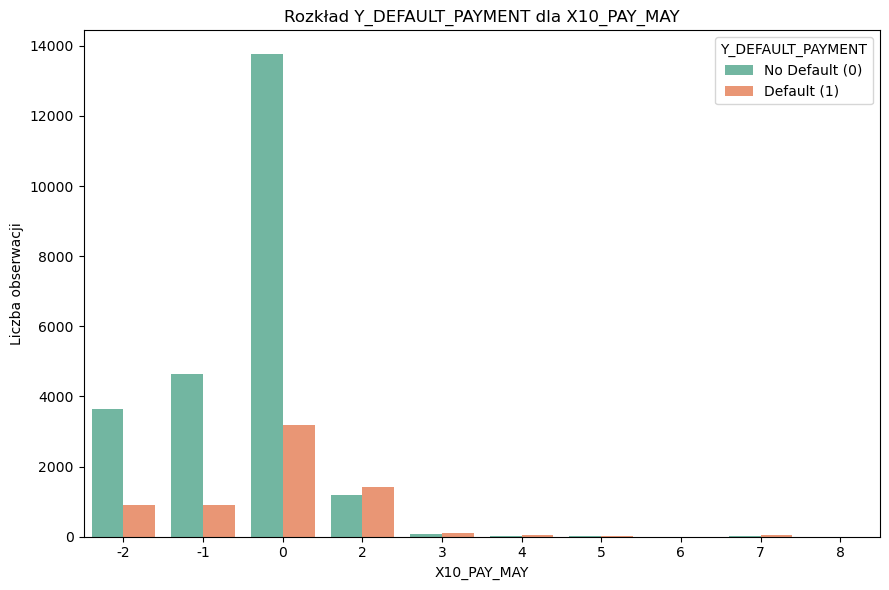

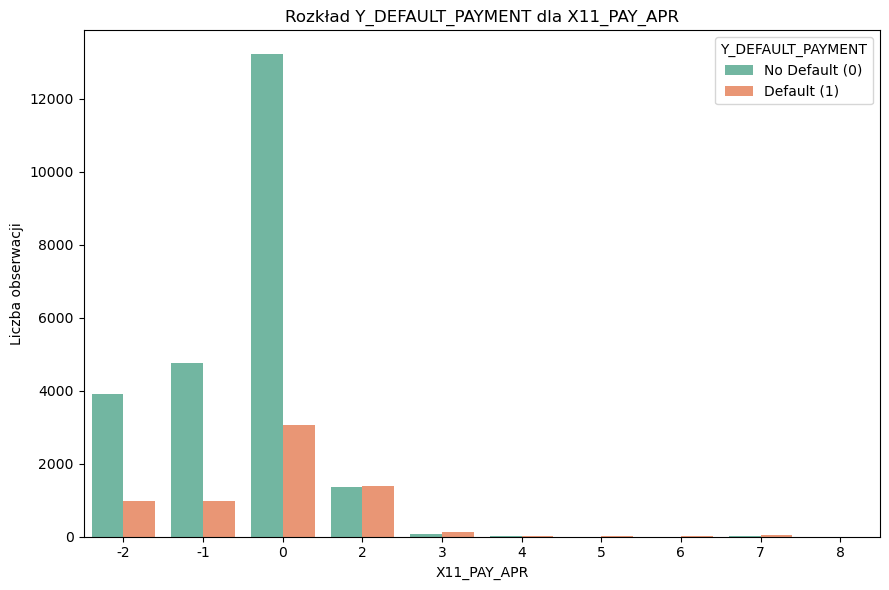

In [21]:
### wykresy słupkowe dla zmiennych kategorycznych
categorical_features = ['X2_SEX', 'X3_EDUCATION', 'X4_MARRIAGE', 'X6_PAY_SEP', 'X7_PAY_AUG', 'X8_PAY_JUL', 'X9_PAY_JUN', 'X10_PAY_MAY', 'X11_PAY_APR']

for col in categorical_features:
    plt.figure(figsize=(9, 6))
    sns.countplot(x=col, hue='Y_DEFAULT_PAYMENT', data=dataframe_prepared, palette='Set2')
    plt.title(f'Rozkład Y_DEFAULT_PAYMENT dla {col}')
    plt.xlabel(col)
    plt.ylabel('Liczba obserwacji')
    plt.legend(title='Y_DEFAULT_PAYMENT', labels=['No Default (0)', 'Default (1)'])
    plt.tight_layout()
    plt.show()

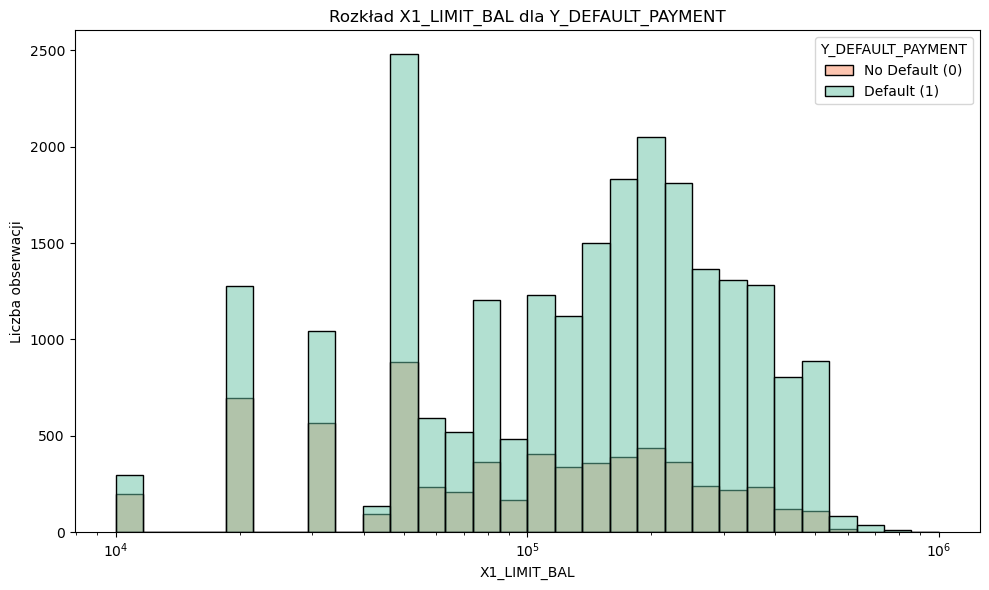

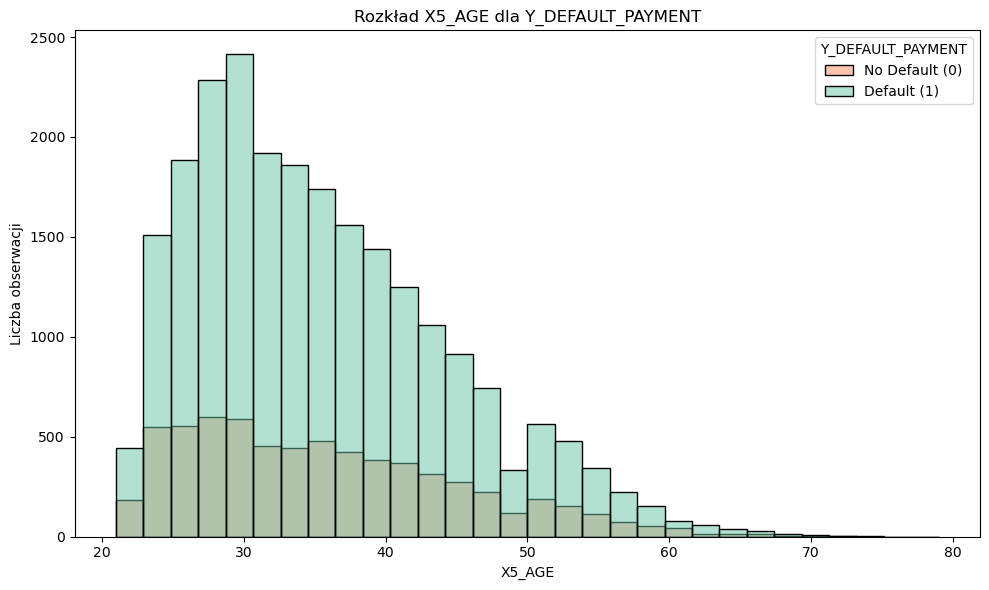

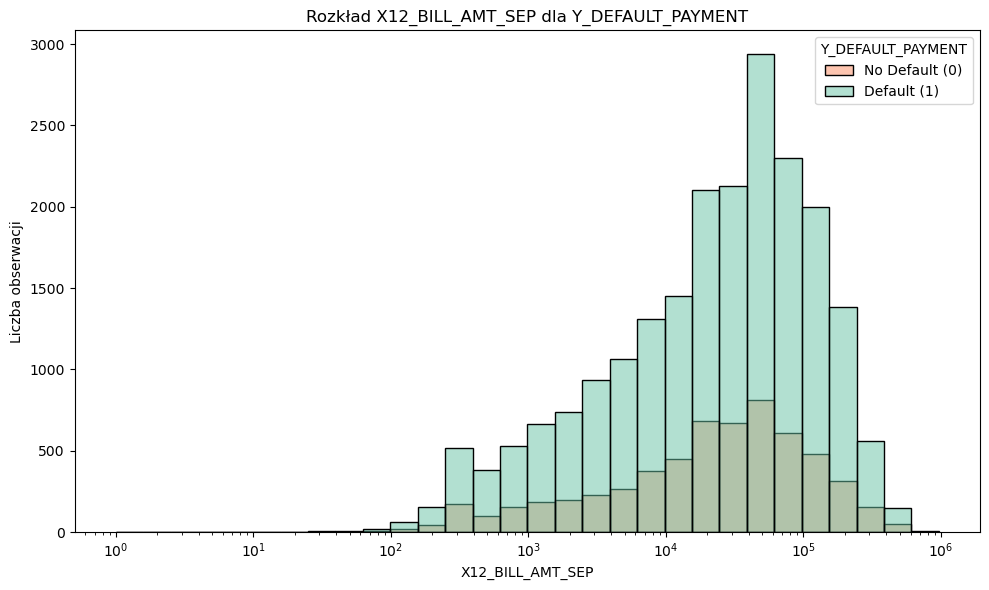

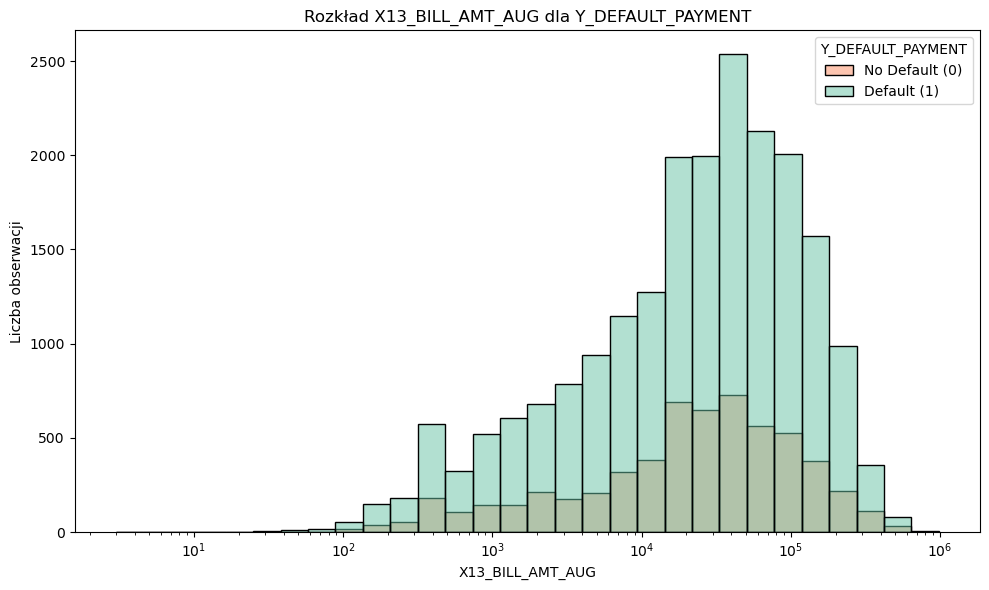

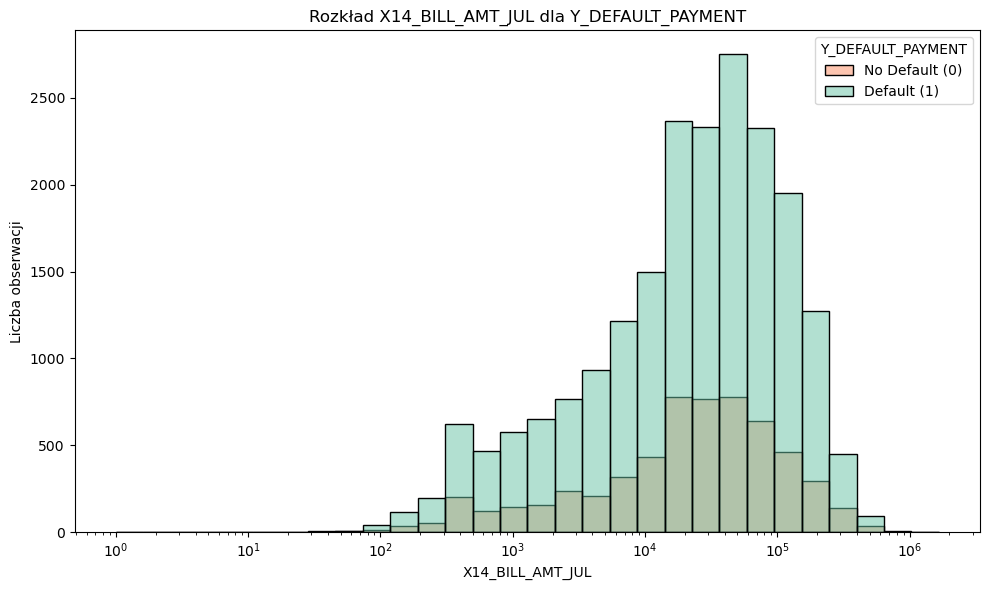

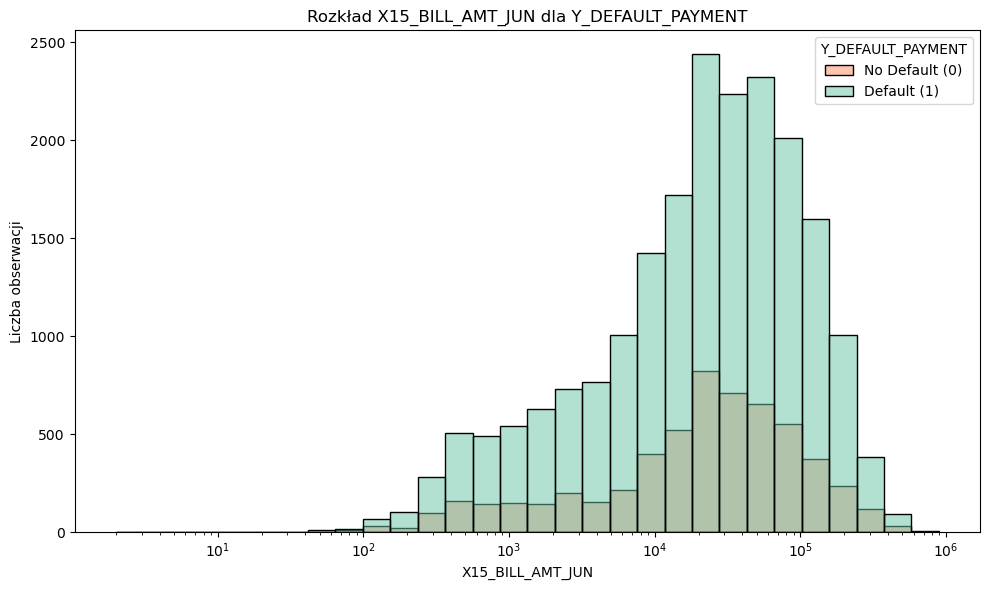

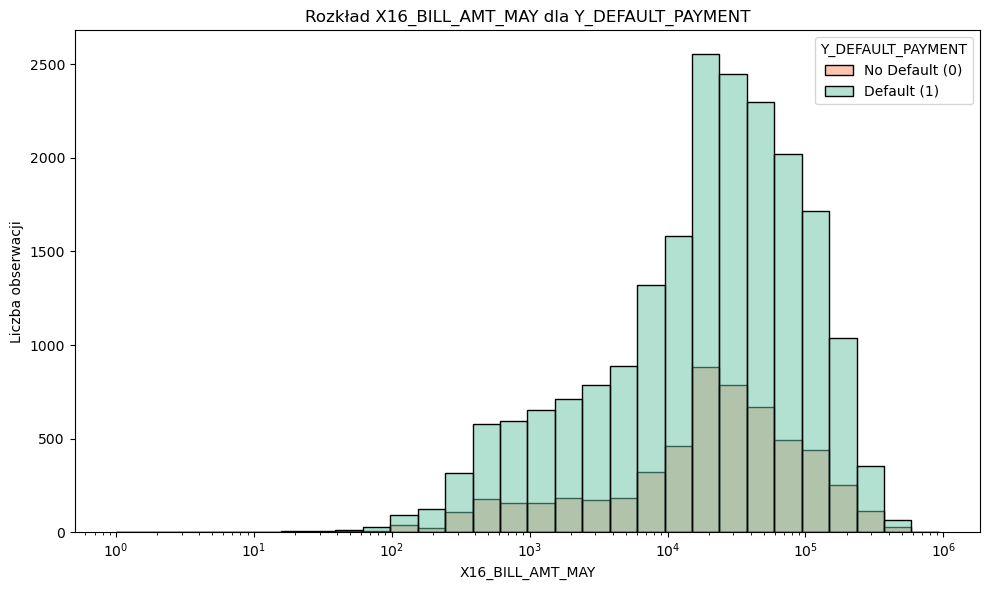

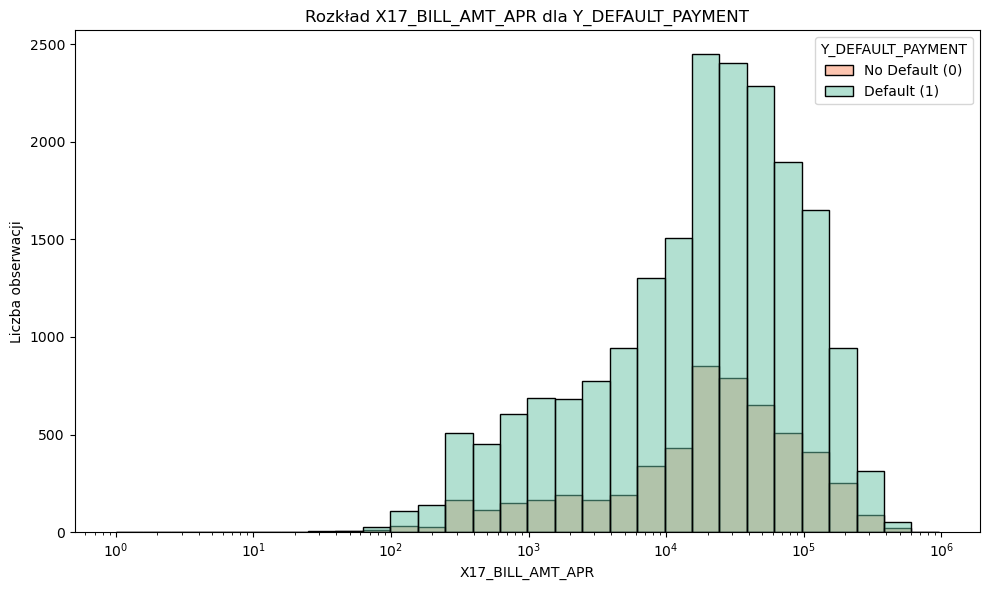

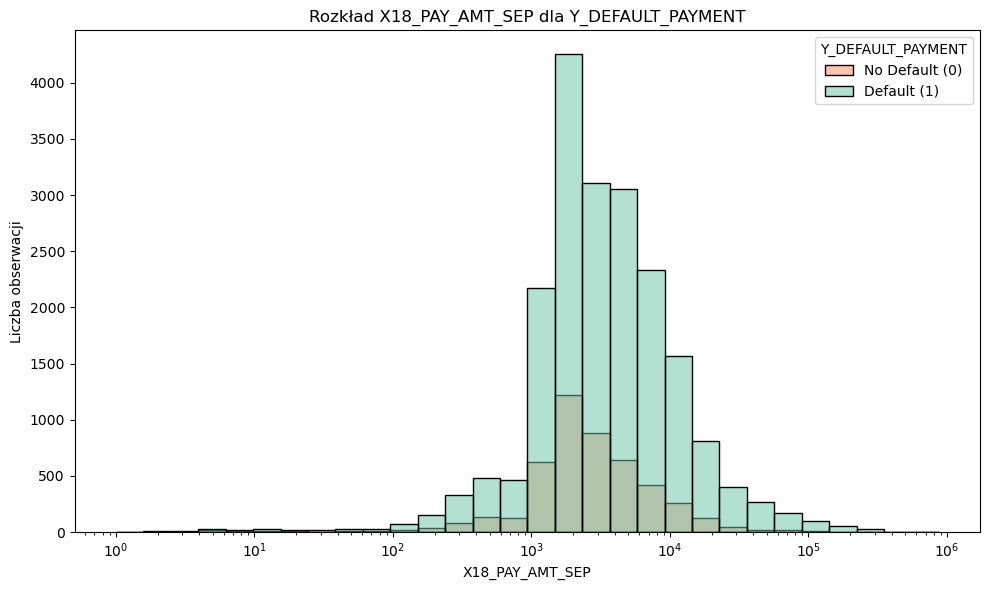

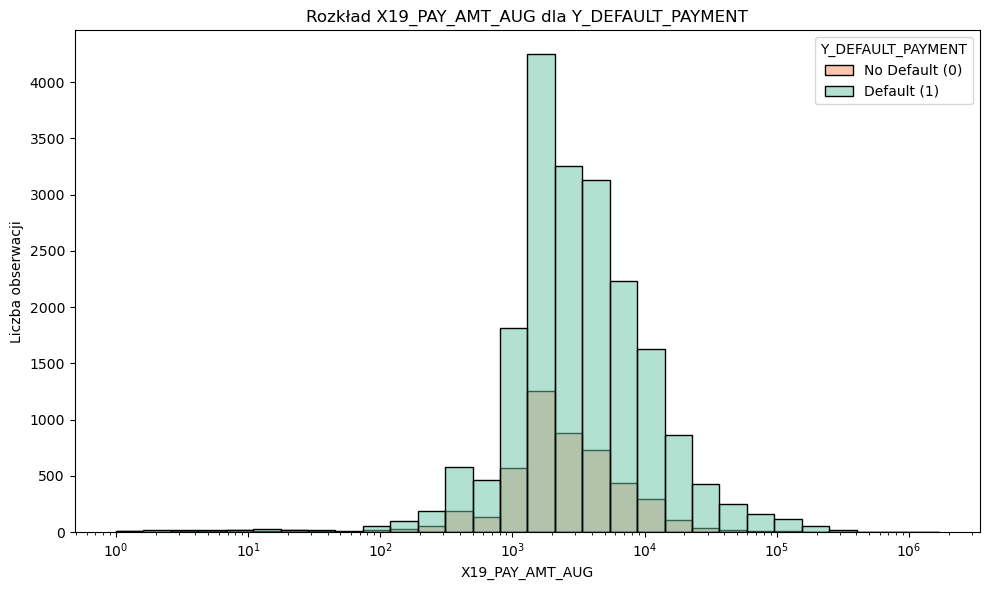

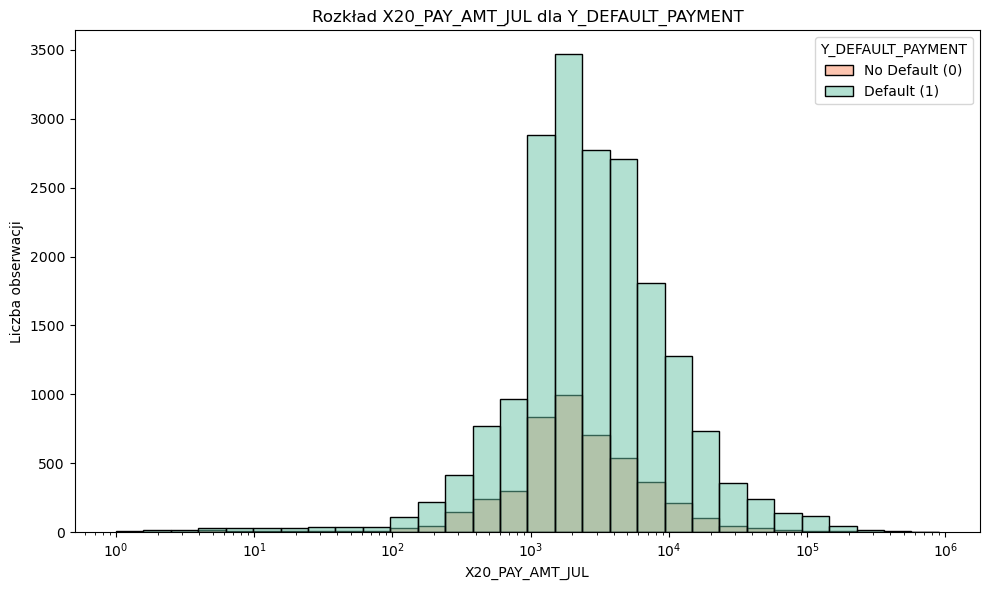

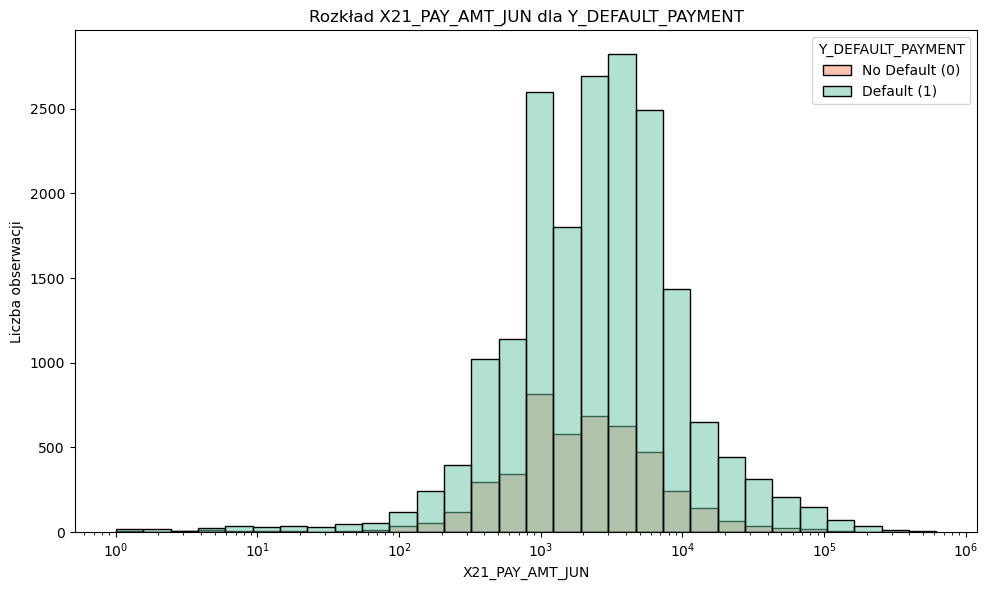

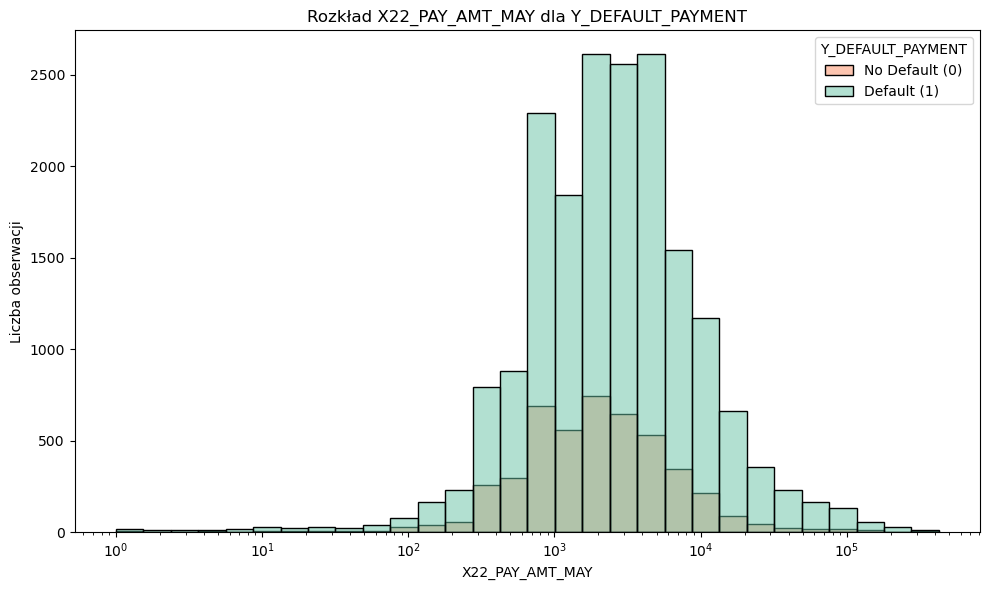

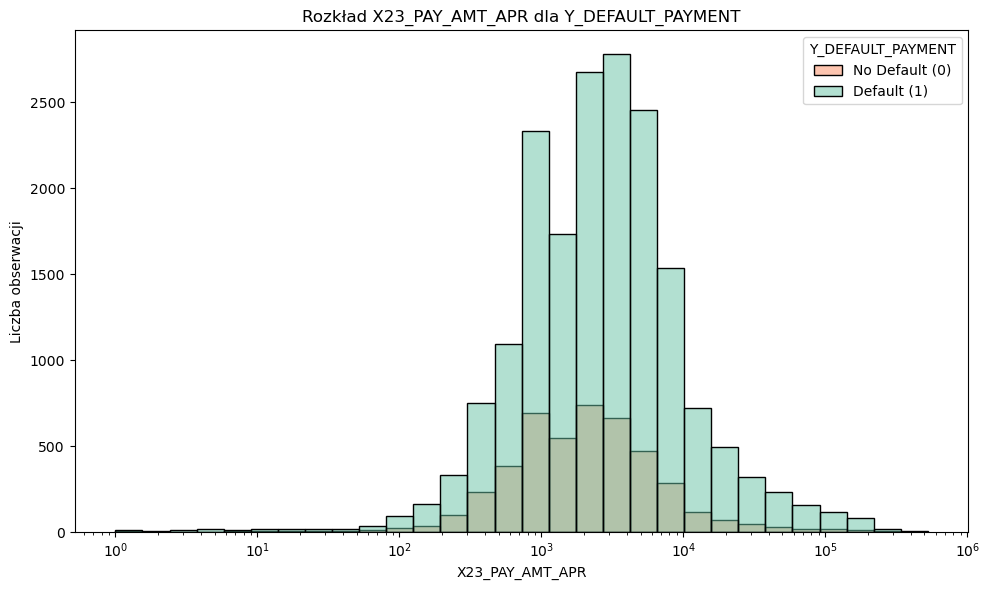

In [22]:
### histogramy dla zmiennych numerycznych
numeric_features = ['X1_LIMIT_BAL', 'X5_AGE', 'X12_BILL_AMT_SEP', 'X13_BILL_AMT_AUG', 'X14_BILL_AMT_JUL', 
                    'X15_BILL_AMT_JUN', 'X16_BILL_AMT_MAY', 'X17_BILL_AMT_APR', 'X18_PAY_AMT_SEP', 
                    'X19_PAY_AMT_AUG', 'X20_PAY_AMT_JUL', 'X21_PAY_AMT_JUN', 'X22_PAY_AMT_MAY', 'X23_PAY_AMT_APR']

for col in numeric_features:
    plt.figure(figsize=(10, 6))
    # log-skala dla zmiennych z dużymi wartościami, z obsługą tylko dla wartości > 0
    if col != 'X5_AGE':
        # filtruje dane, aby zawierały tylko wartości > 0 przed zastosowaniem skali log
        plot_data = dataframe_prepared[dataframe_prepared[col] > 0]
        sns.histplot(data=plot_data, x=col, hue='Y_DEFAULT_PAYMENT', log_scale=(True, False), bins=30, palette='Set2')
    else:
        # dla age nie ma potrzeby filtrowania
        sns.histplot(data=dataframe_prepared, x=col, hue='Y_DEFAULT_PAYMENT', bins=30, palette='Set2')
    plt.title(f'Rozkład {col} dla Y_DEFAULT_PAYMENT')
    plt.xlabel(col)
    plt.ylabel('Liczba obserwacji')
    plt.legend(title='Y_DEFAULT_PAYMENT', labels=['No Default (0)', 'Default (1)'])
    plt.tight_layout()
    plt.show()

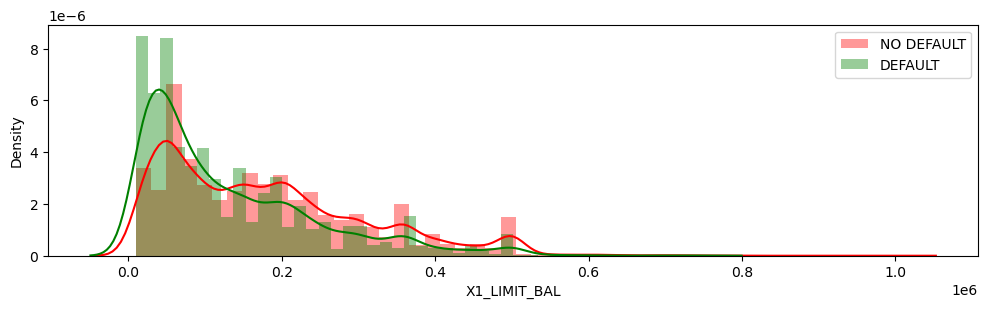

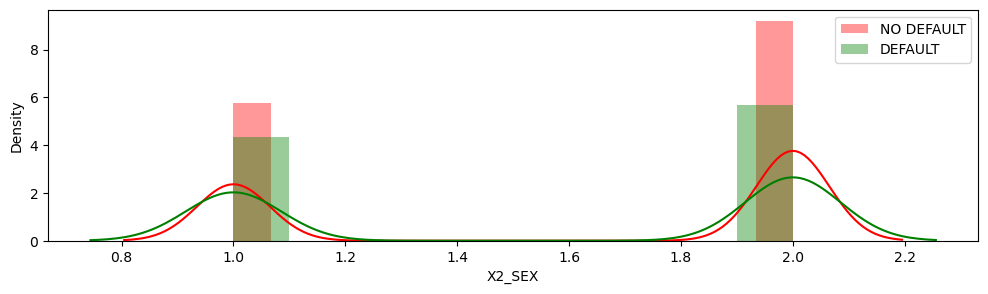

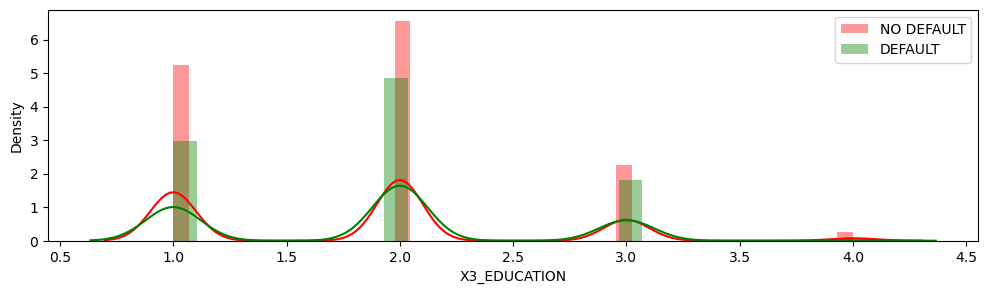

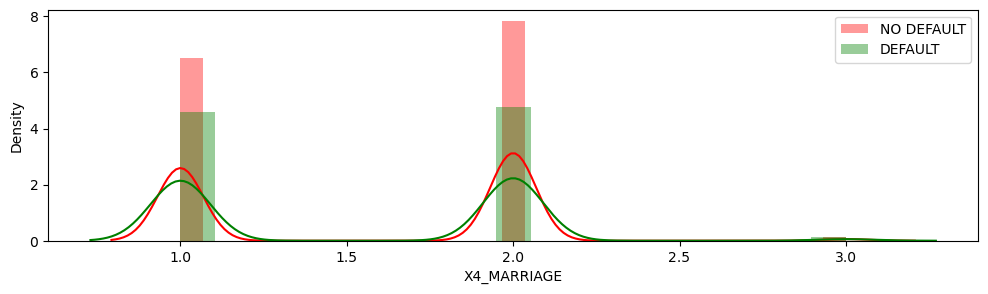

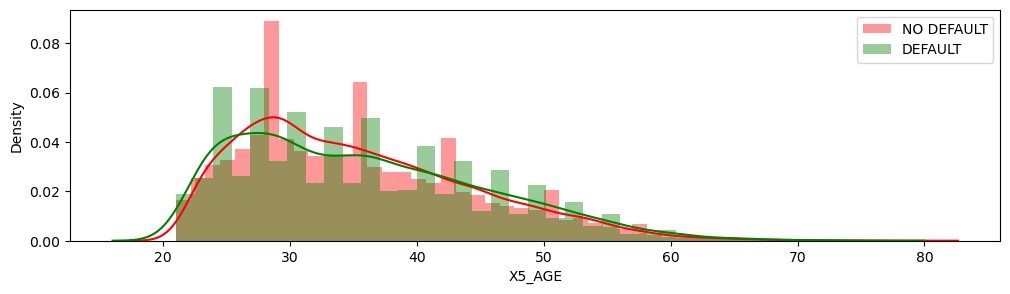

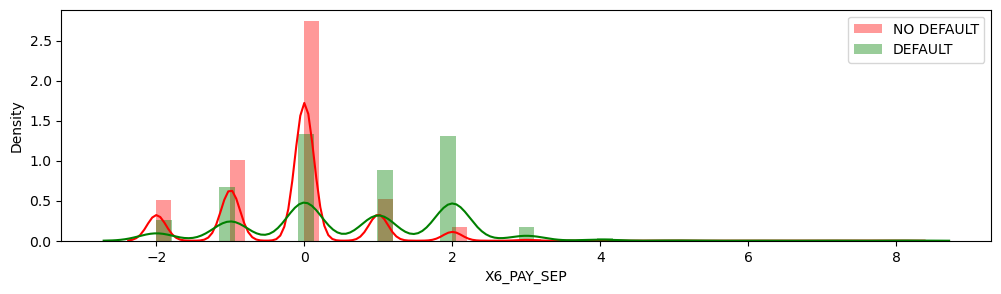

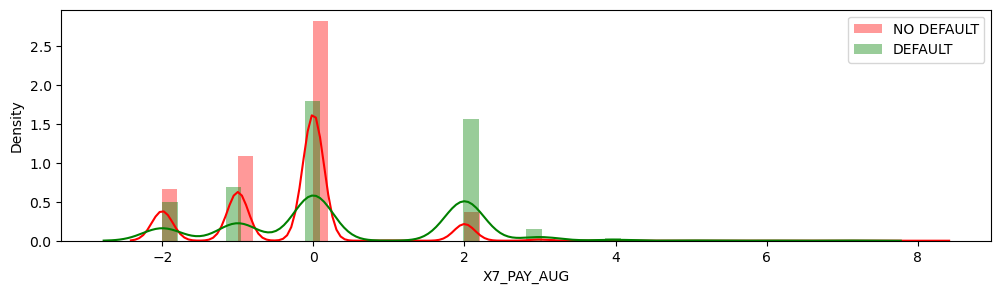

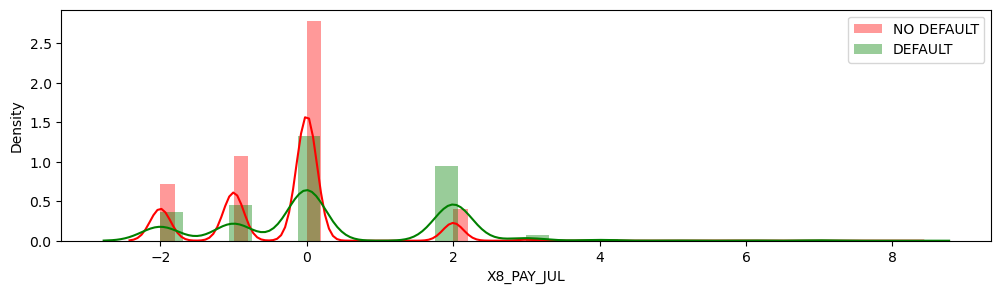

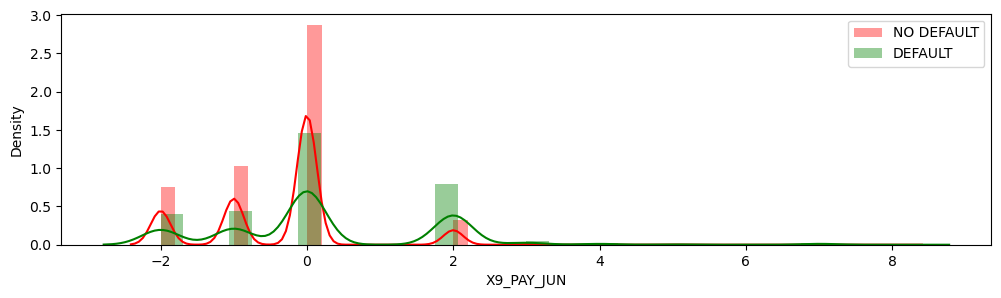

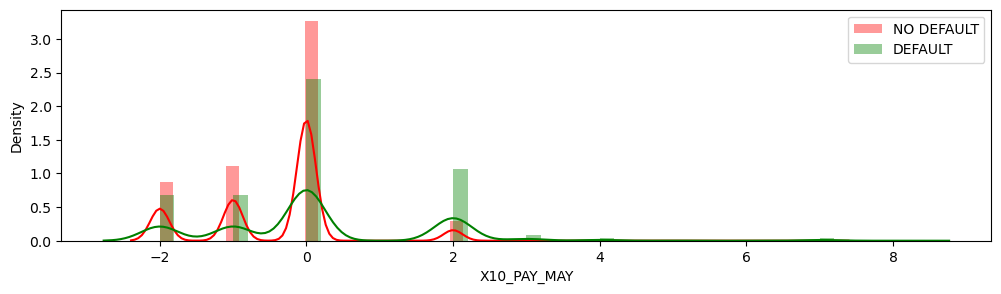

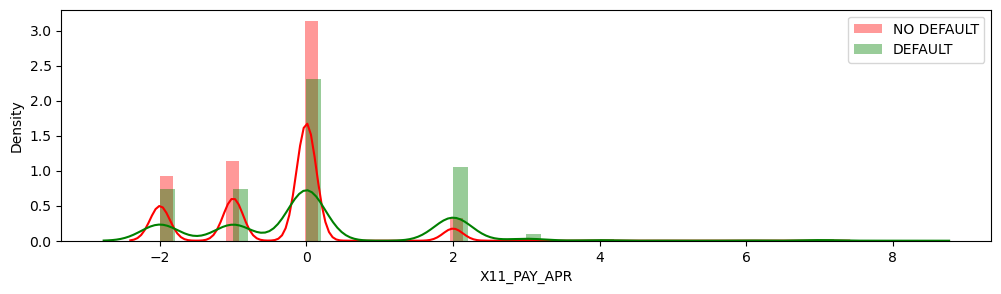

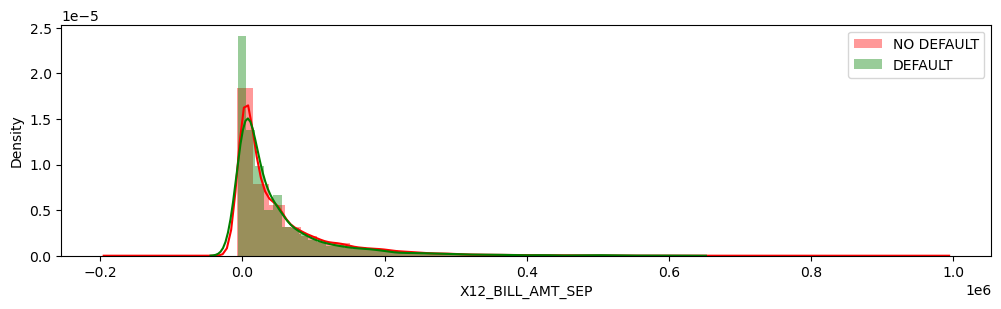

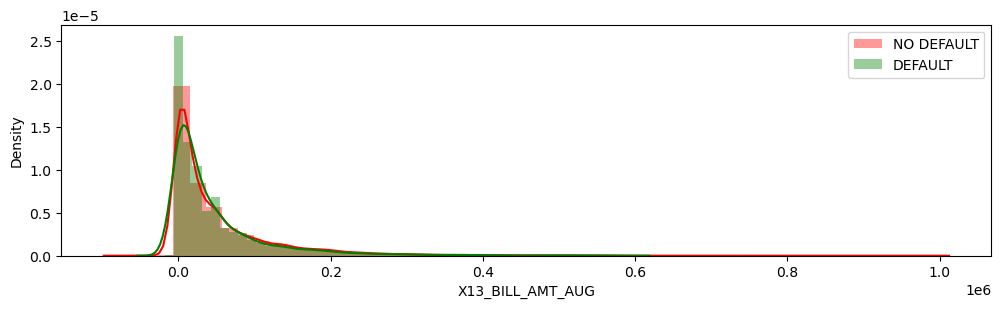

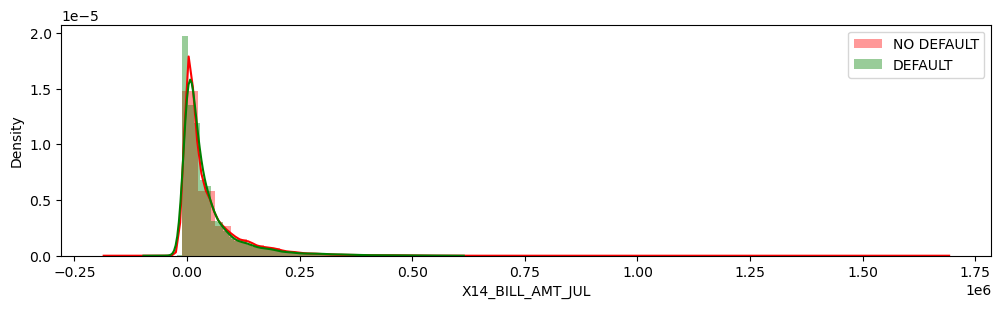

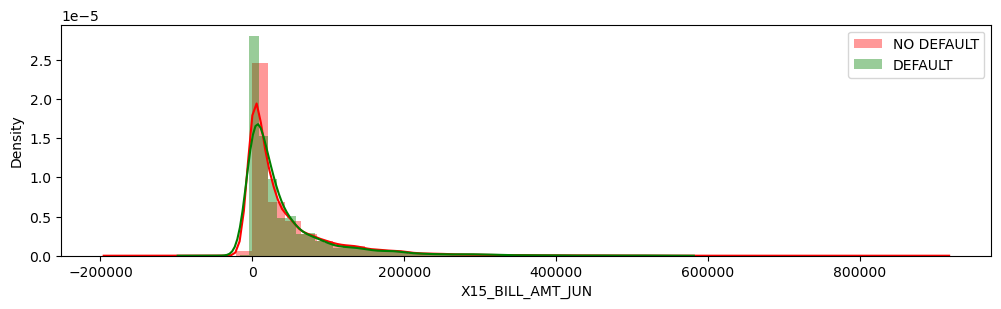

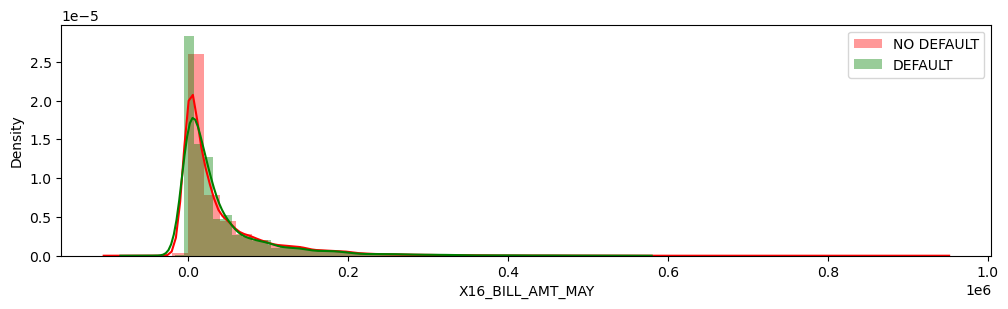

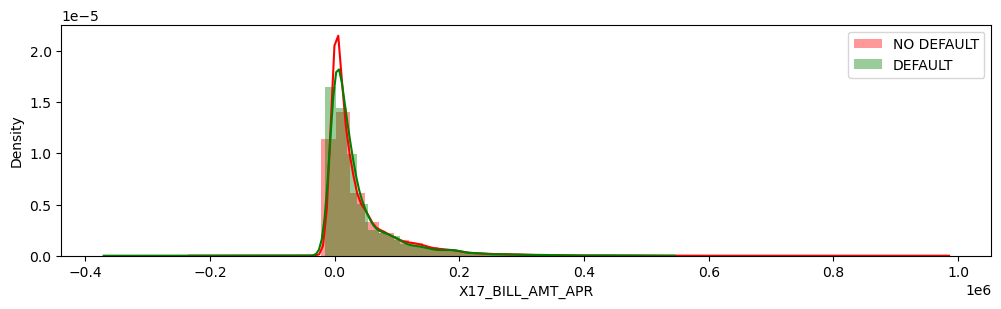

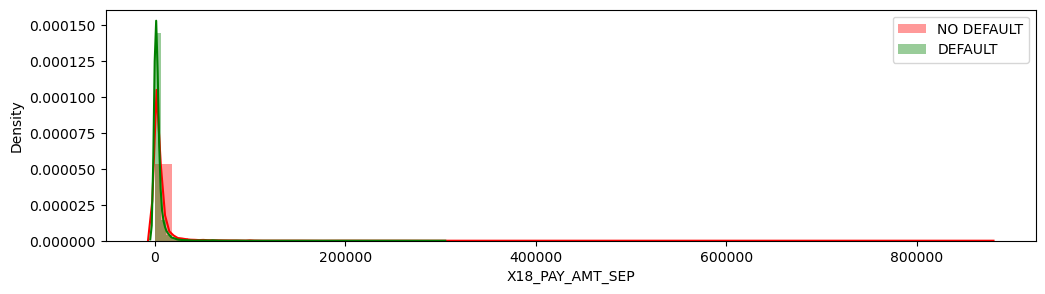

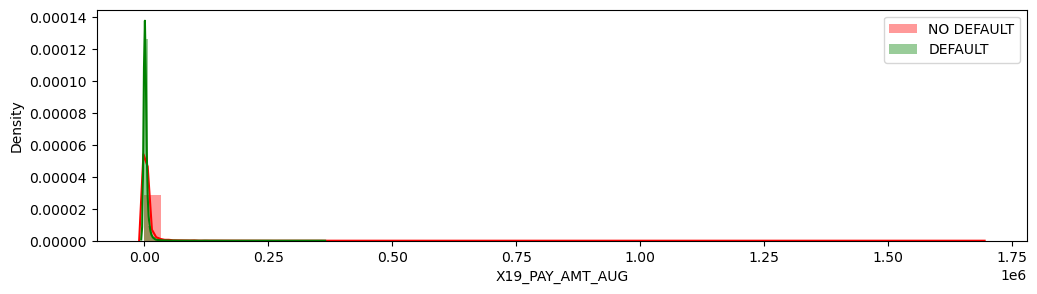

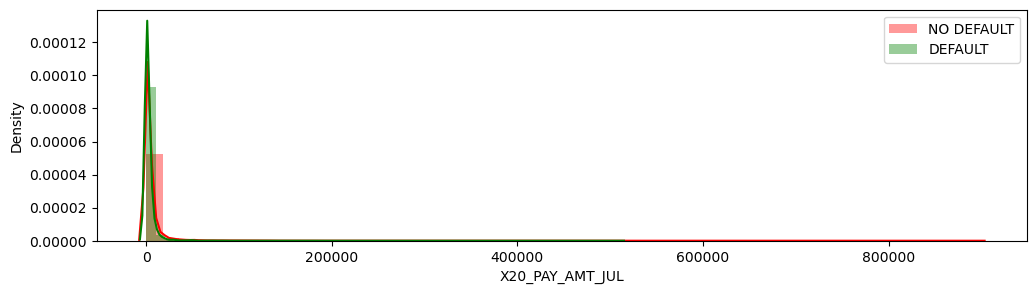

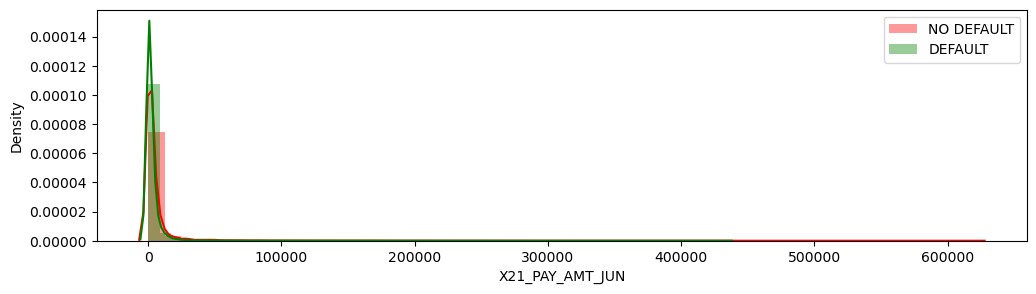

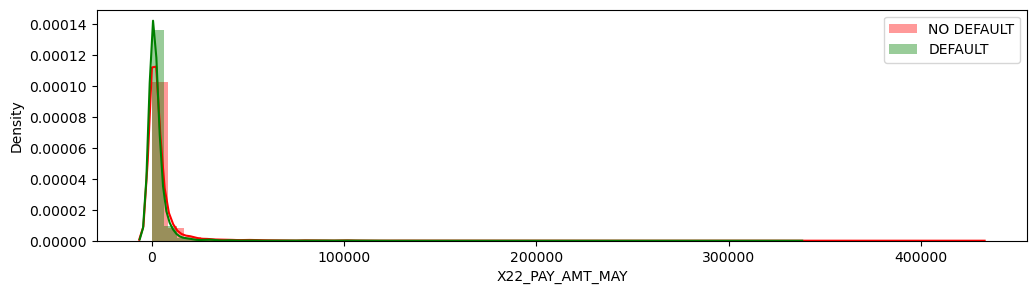

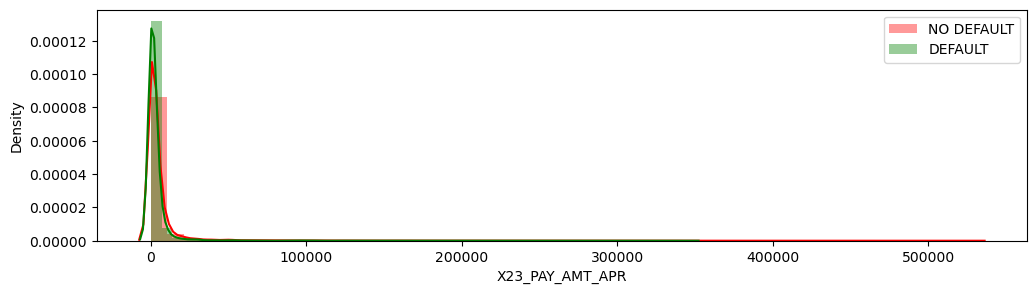

In [23]:
for col in features:
    plt.figure(figsize=(12, 3))
    sns.distplot(dataframe_prepared.loc[dataframe_prepared['Y_DEFAULT_PAYMENT']==0, col], kde=True, color='red', label='NO DEFAULT')
    sns.distplot(dataframe_prepared.loc[dataframe_prepared['Y_DEFAULT_PAYMENT']==1, col], kde=True, color='green', label='DEFAULT')
    plt.legend(loc='upper right')
    plt.show()

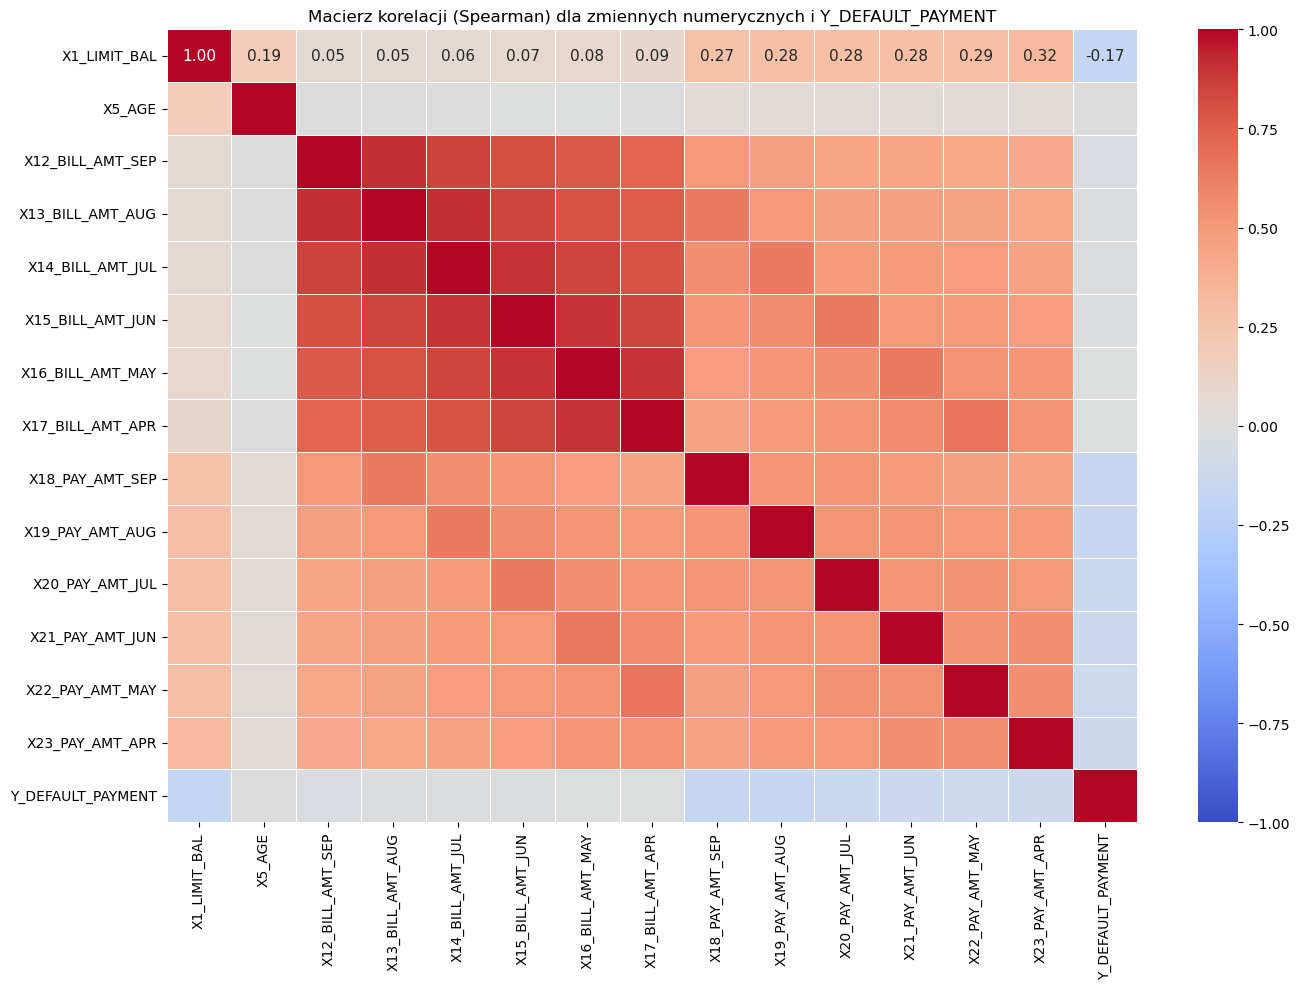

In [24]:
## macierz korelacji dla zmiennych numerycznych (korelacja Spearmana, bo dane są skośne)
plt.figure(figsize=(14, 10))
corr_matrix = dataframe_prepared[numeric_features + ['Y_DEFAULT_PAYMENT']].corr(method='spearman')
# zamiana NaN na 0 dla wizualizacji (uwaga: tylko do wyświetlenia, nie zmienia danych)
corr_matrix_display = corr_matrix.fillna(0)
sns.heatmap(corr_matrix_display, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f', linewidths=0.5, annot_kws={'size': 11})
plt.title('Macierz korelacji (Spearman) dla zmiennych numerycznych i Y_DEFAULT_PAYMENT')
plt.tight_layout()
plt.show()

In [25]:
## macierz korelacji z Y_DEFAULT_PAYMENT (zmienna objaśniana kategoryczna jest binarna) dla zmiennych numerycznych (Point-biserial correlation)
from scipy.stats import pointbiserialr
correlations = {}
for col in numeric_features:
    corr, _ = pointbiserialr(dataframe_prepared[col], dataframe_prepared['Y_DEFAULT_PAYMENT'])
    correlations[col] = corr
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])
print(corr_df.sort_values(by='Correlation', ascending=False))

                  Correlation
X5_AGE               0.013890
X17_BILL_AMT_APR    -0.005372
X16_BILL_AMT_MAY    -0.006760
X15_BILL_AMT_JUN    -0.010156
X14_BILL_AMT_JUL    -0.014076
X13_BILL_AMT_AUG    -0.014193
X12_BILL_AMT_SEP    -0.019644
X23_PAY_AMT_APR     -0.053183
X22_PAY_AMT_MAY     -0.055124
X20_PAY_AMT_JUL     -0.056250
X21_PAY_AMT_JUN     -0.056827
X19_PAY_AMT_AUG     -0.058579
X18_PAY_AMT_SEP     -0.072929
X1_LIMIT_BAL        -0.153520


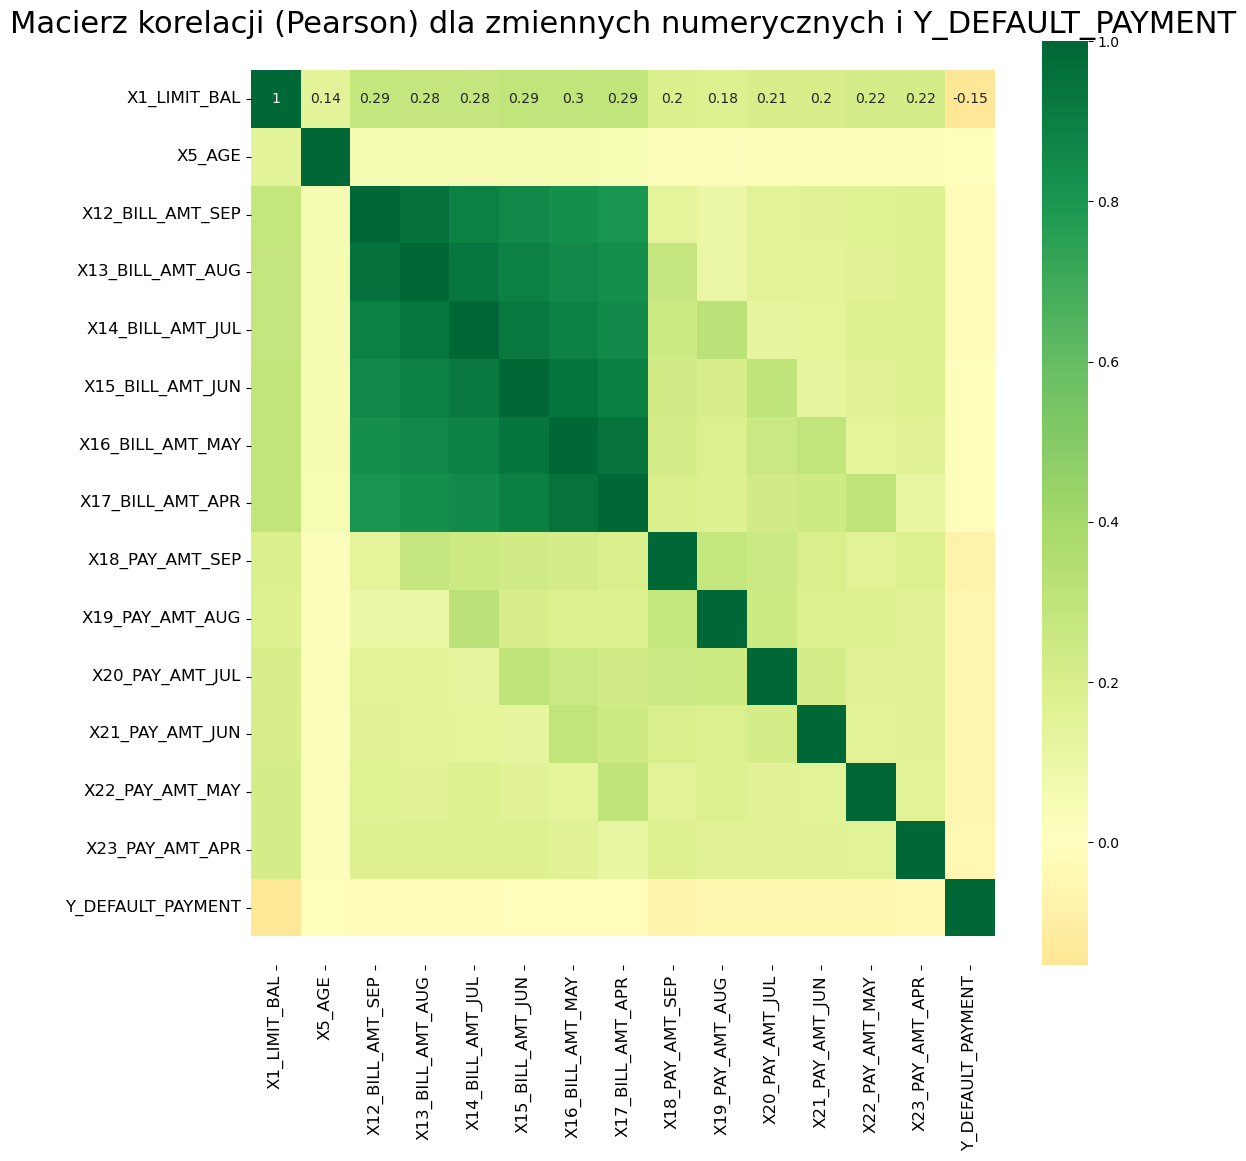

In [26]:
## macierz korelacji dla zmiennych numerycznych (Pearson)

plt.figure(figsize=(12, 12))
corr_num_matrix = dataframe_prepared[numeric_features + ['Y_DEFAULT_PAYMENT']].corr()
ax = sns.heatmap(corr_num_matrix,
                 xticklabels=corr_num_matrix.columns,
                 yticklabels=corr_num_matrix.columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Macierz korelacji (Pearson) dla zmiennych numerycznych i Y_DEFAULT_PAYMENT', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [27]:
## korelacja dla zmiennych kategorycznych wzajemna i z Y_DEFAULT_PAYMENT

from scipy.stats import chi2_contingency

# korelacja z Y_DEFAULT_PAYMENT (phi coefficient)
for col in categorical_features:
    contingency_table = pd.crosstab(dataframe_prepared[col], dataframe_prepared['Y_DEFAULT_PAYMENT'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi = np.sqrt(chi2 / n)
    print(f"Korelacja phi między {col} a Y_DEFAULT_PAYMENT: {phi:.3f} (p-value: {p:.3f})")

# korelacja wzajemna między zmiennymi kategorycznymi (Cramér's V)
from scipy.stats.contingency import association

for i, col1 in enumerate(categorical_features):
    for col2 in categorical_features[i+1:]:
        contingency_table = pd.crosstab(dataframe_prepared[col1], dataframe_prepared[col2])
        cramers_v = association(contingency_table, method='cramer')
        print(f"Cramér's V między {col1} a {col2}: {cramers_v:.3f}")

Korelacja phi między X2_SEX a Y_DEFAULT_PAYMENT: 0.040 (p-value: 0.000)
Korelacja phi między X3_EDUCATION a Y_DEFAULT_PAYMENT: 0.073 (p-value: 0.000)
Korelacja phi między X4_MARRIAGE a Y_DEFAULT_PAYMENT: 0.032 (p-value: 0.000)
Korelacja phi między X6_PAY_SEP a Y_DEFAULT_PAYMENT: 0.423 (p-value: 0.000)
Korelacja phi między X7_PAY_AUG a Y_DEFAULT_PAYMENT: 0.340 (p-value: 0.000)
Korelacja phi między X8_PAY_JUL a Y_DEFAULT_PAYMENT: 0.296 (p-value: 0.000)
Korelacja phi między X9_PAY_JUN a Y_DEFAULT_PAYMENT: 0.279 (p-value: 0.000)
Korelacja phi między X10_PAY_MAY a Y_DEFAULT_PAYMENT: 0.271 (p-value: 0.000)
Korelacja phi między X11_PAY_APR a Y_DEFAULT_PAYMENT: 0.251 (p-value: 0.000)
Cramér's V między X2_SEX a X3_EDUCATION: 0.028
Cramér's V między X2_SEX a X4_MARRIAGE: 0.031
Cramér's V między X2_SEX a X6_PAY_SEP: 0.068
Cramér's V między X2_SEX a X7_PAY_AUG: 0.077
Cramér's V między X2_SEX a X8_PAY_JUL: 0.073
Cramér's V między X2_SEX a X9_PAY_JUN: 0.067
Cramér's V między X2_SEX a X10_PAY_MAY: 0.

In [28]:
# podział na treningowe/testowe przed kolejną aktualizacją pipeline (uniknięcie wycieku)
from sklearn.model_selection import train_test_split

X = dataframe_prepared.drop(['Y_DEFAULT_PAYMENT'], axis=1)
y = dataframe_prepared['Y_DEFAULT_PAYMENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)



from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# definicja kolumn numerycznych do przetworzenia przez PCA
num_features_for_pca = ['X12_BILL_AMT_SEP', 'X13_BILL_AMT_AUG', 'X14_BILL_AMT_JUL',
                   'X15_BILL_AMT_JUN', 'X16_BILL_AMT_MAY', 'X17_BILL_AMT_APR', 'X5_AGE']



## aktualizacja pipeline
steps = [
    ('prepare_column_and_index', PrepareColumnAndIndex(
        index_col='ID',
        new_column_names=new_columns,
        categorical_columns=categorical_columns
    )),
    ('adjust_x3_education_categories', AdjustX3EducationCategories(
        target_column='X3_EDUCATION',
        categories_to_replace=[0, 5, 6],
        replacement_category=4
    )),
    ('adjust_x4_marriage_categories', AdjustX4MarriageCategories(
        marriage_column='X4_MARRIAGE',
        age_column='X5_AGE',
        age_threshold=35
    )),
    ('preprocess', ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=3)),  # PCA tylko dla num_features_for_pca
                ('scaler_2', StandardScaler())
            ]), ['X12_BILL_AMT_SEP', 'X13_BILL_AMT_AUG', 'X14_BILL_AMT_JUL',
                 'X15_BILL_AMT_JUN', 'X16_BILL_AMT_MAY', 'X17_BILL_AMT_APR', 'X5_AGE']),
            ('num_passthrough', StandardScaler(), ['X1_LIMIT_BAL', 'X18_PAY_AMT_SEP',
                                                  'X19_PAY_AMT_AUG', 'X20_PAY_AMT_JUL',
                                                  'X21_PAY_AMT_JUN', 'X22_PAY_AMT_MAY',
                                                  'X23_PAY_AMT_APR']),
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
        ],
        remainder='passthrough'
    ))
]


data_preparation_pipeline = Pipeline(steps=steps)


X_train_prepared = data_preparation_pipeline.fit(X_train, y_train).transform(X_train)
X_test_prepared = data_preparation_pipeline.transform(X_test)


print("Kształt danych po PCA i OneHotEncoder:", X_train_prepared.shape)

Kształt danych po PCA i OneHotEncoder: (24000, 74)
